In [11]:
from rdkit import Chem
from rdkit.Chem import AllChem
import py3Dmol
import pandas as pd
import numpy as np
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
from IPython.display import display
import os


In [2]:

def visualize_molecule_2d(smiles):
    """
    Generates an image of the molecule from a SMILES string.

    Args:
    smiles (str): A SMILES string representing the molecule.

    Returns:
    An IPython.display.Image object of the molecule.
    """
    # Convert the SMILES string to an RDKit molecule
    molecule = Chem.MolFromSmiles(smiles)
    if molecule is None:
        raise ValueError("Invalid SMILES string")

    # Generate the image
    return Draw.MolToImage(molecule)

def visualize_molecule_3d(smiles, max_attempts=5):
    """
    Generates a 3D visualization of the molecule from a SMILES string,
    attempting multiple times to generate a feasible structure.

    Args:
    smiles (str): A SMILES string representing the molecule.
    max_attempts (int): Maximum number of attempts to generate a 3D structure.

    Returns:
    A 3D visualization of the molecule.
    """
    # Convert the SMILES string to an RDKit molecule
    molecule = Chem.MolFromSmiles(smiles)
    if molecule is None:
        raise ValueError("Invalid SMILES string")

    # Add hydrogens
    molecule = Chem.AddHs(molecule)

    # Attempt to generate 3D coordinates multiple times
    for attempt in range(max_attempts):
        if AllChem.EmbedMolecule(molecule, randomSeed=42+attempt) == 0:
            # Successful conformer generation
            break
    else:
        # If all attempts fail, raise an error
        raise ValueError("Failed to generate a feasible 3D structure after multiple attempts")

    # Use Py3Dmol for visualization
    mb = Chem.MolToMolBlock(molecule)
    viewer = py3Dmol.view(width=400, height=400)
    viewer.addModel(mb, 'mol')
    viewer.setStyle({'stick': {}})
    viewer.zoomTo()
    return viewer.show()


In [6]:
smile = '[H]O[C@@]12[C@@]([H])(O[C@@]3(OC([H])([H])[C@]([H])(C([H])([H])[H])C([H])([H])C3([H])[H])[C@@]1([H])C([H])([H])[H])C([H])([H])[C@@]1([H])[C@]3([H])C([H])([H])C([H])([H])[C@]4([H])C([H])([H])C(OC([H])([H])[H])(OC([H])([H])[H])C([H])([H])C([H])([H])[C@]4(C([H])([H])[H])[C@@]3([H])C([H])([H])C(=O)[C@]21C([H])([H])[H]'

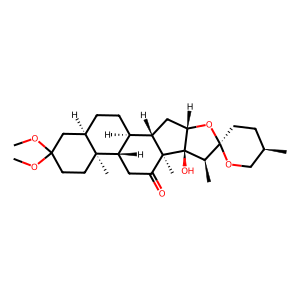

In [7]:
visualize_molecule_2d(smile)

In [8]:
visualize_molecule_3d(smile)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [16]:
from rdkit import Chem
from rdkit.Chem import AddHs

def count_ch_bonds(smiles):
    try:
        # Convert SMILES to a molecule object
        mol = Chem.MolFromSmiles(smiles)
        
        if mol is not None:
            ch_bond_count = 0
            mol = AddHs(mol)
            
            # Iterate through atoms in the molecule
            for atom in mol.GetAtoms():
                # Check if the atom is Carbon (C)
                if atom.GetAtomicNum() == 6:
                    # Iterate through the atom's neighbors
                    for neighbor in atom.GetNeighbors():
                        # Check if the neighbor is Hydrogen (H)
                        if neighbor.GetAtomicNum() == 1:
                            ch_bond_count += 1
                            break
            
            return ch_bond_count
        
        else:
            print("Invalid SMILES notation.")
            return None
    
    except Exception as e:
        print(f"Error: {e}")
        return None

# Example usage:
smiles_notation = 'C1=CC(=CC=C1OC(C(=O)O)OC2=CC=C(C=C2)Cl)Cl'
ch_bonds = count_ch_bonds(smiles_notation)

if ch_bonds is not None:
    print(f"Number of C-H bonds in the molecule: {ch_bonds}")


Number of C-H bonds in the molecule: 9


In [4]:
idx = 0
df = pd.read_csv('./nmr_smile_solvent_3dgnn.csv')
smile = df.iloc[idx]['SMILES']

In [4]:
# one more file will cause ComENet to have nan when the distance vector is not dealth with
df = pd.read_csv('./nmr_smile_solvent_filtered_3dgnn.csv')
print(len(df))
df_filtered = df[df['File_name']!='31173.csv']
print(len(df_filtered))

28462
28461


In [5]:
df_filtered.to_csv('nmr_smile_solvent_filtered_3dgnn.csv')

In [7]:
# these csv only has one line, drop
drop_list = [ x + '.csv' for x in ['34855','34280','31971','30930','31238','33518','32337','33634','31097','09909','31673','31288','09911','32375','33168','32171','31860',
'35721','09914','34046','33452','09898','32405','31520','31377','31861','31614','09342','32334','09319',
'33331','32103','32240','31441','31470','09896','32033','33045','31072','34597','34047','31335',
'34823','32596','34979','31751','35715','31534','31005','31073','30949','09889','33923','09919','32915','31875','33150','32615',
'32614','33691','32392','32685','13911','31184','35538','34058','35705','31752','31166','32986','31793','33046','30785','33457','32232','34861','31481','31382','31006','33278','33730','31079','33420',
'31366','32559','32330','32381','31385','32382','31760','31188','31496','09934','09910','33710','32278','33810','33042','30799',
'31489','35739','09796','35687','34251','33231','30931','32403','33726','31750','31454','30797','33820','32612','30933','35335',
'33050','34254','30802','35150','33922','31442','31117','31821','34501','32843','32984','32170','31065','32273','35710','35711',
'33276','31089','33044','31859','32345','33124','35148','33586','33642','32967','31876','09905','34250','31538','09750','09902',
'31622','34860','32868','31550','32376','33646','33864','34623',
'31383','33115','10376','31570', '01016', '09089', '10935', '18235']]

df = pd.read_csv('./nmr_smile_solvent_filtered_3dgnn.csv')
print(len(df))
df2 = df[~df['File_name'].isin(drop_list)]
print(len(df2))

28461
28298


In [9]:
df2.to_csv('nmr_smile_solvent_filtered2_3dgnn.csv')

In [14]:
## a few dp gives nan values using Spherenet algorithm
smiles_file = ['19600', '09140', '09139', '32257', '15523', '08951', '33227', '31566', '19601', '31508', \
          '09412', '32275', '32702', '14673', '15501', '22433', '08953', '09303', '32258', '32255', \
            '33234', '32646', '34267', '35202', '20947', '09522', '15525', '31658', '32394', '31633', \
            '00573', '31579', '33519', '07629', '31918', '15527', '31036', '34263', '15526', \
            '07558', '32520', '33582', '09313', '32261', '32272', '33884', '15502', '32185', \
            '35149', '34268', '33226', '00867', '34269', '33495', '30777', '13906', '15114', \
            '32564', '30926', '31615', '09430', '32369', '14809', '32640', '33225', '31640', \
            '31120', '30927', '00571', '08952', '32237', '35226', '22434', '32274', '09523', \
            '32222', '34238', '31655', '07627', '31795', '35147', '00380', '09304', '15366', \
            '31523', '15113', '09278', '30813', '09992', '32565', '33302', '31176', '07628', \
            '13907', '09296', '00570', '33237', '32420', '32597', '31932', '32266', '31201', \
            '15707', '35598', '15115', '32422', '09214', '09300', '09264', '08526', '32269', \
            '34704', '00381', '32635', '34705', '09855', '31430']
smiles_file = [x + '.csv' for x in smiles_file]
filtered_df = df[df['File_name'].isin(smiles_file)]
smiles = filtered_df['SMILES'].tolist()

for s in smiles:
    print(s)
    visualize_molecule_3d(s, max_attempts=10)
    break

C=C[C@H]1CN2CC[C@H]1C[C@H]2[C@@H](C3=CC=NC4=CC=CC=C34)O.Cl.Cl


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [13]:
# remove nan rows from df
df_filtered = df[~df['File_name'].isin(smiles_file)]
df_filtered.to_csv('nmr_smile_solvent_filtered_3dgnn.csv')

In [ ]:
tmp = pd.DataFrame({'file': smiles_file, 'smile:': smiles})
tmp

,file,smile:
0,19600.csv,C=C[C@H]1CN2CC[C@H]1C[C@H]2[C@@H](C3=CC=NC4=CC...
1,09140.csv,C=C[C@H]1CN2CC[C@H]1C[C@H]2[C@@H](C3=CC=NC4=CC...
2,09139.csv,C([C@@H]1[C@H]([C@@H]([C@H]([C@H](O1)OP(=O)([O...
3,32257.csv,C([C@@H]1[C@@H]([C@@H]([C@H](C(O1)OC[C@@H]2[C@...
4,15523.csv,CC1=CN(C(=O)NC1=O)[C@H]2C[C@@H]([C@H](O2)COP(=...
...,...,...
112,00381.csv,[Na+].[Na+].[Na+].[Na+].[Na+].[H]O[C@@]1([H])C...
113,32635.csv,[Na+].[Na+].[Na+].[Na+].[H]O[C@@]([H])(C([H])(...
114,34705.csv,[Na+].[Na+].[H]OC([H])([H])[C@@]1([H])O[C@@]([...
115,09855.csv,[Na+].[Na+].[Na+].[Na+].[Na+].[H]O[C@]([H])(C(...


In [ ]:
#### gather IDs of smiles that failed to generate 3d coordinates
import os
list_3d = os.listdir('./graph_3d/')
list_3d = [x.split('.')[0] + '.csv' for x in list_3d]
df = pd.read_csv('nmr_smile_solvent_web_sat_combined2.csv')
# Find the rows where the column value is not in your list
mask = ~df['File_name'].isin(list_3d)

# Get the indices of those rows
indices = df.index[mask]

# 'indices' now contains the indices of the rows where the column values are not in the list
print(indices)

# save 3d df 
df2 = df[~mask]
df2.to_csv('nmr_smile_solvent_3dgnn.csv')


Index([  164,   259,   352,   445,   583,  1204,  1224,  1225,  1226,  1227,
       ...
       27895, 27913, 27951, 27966, 28021, 28032, 28063, 28198, 28391, 28623],
      dtype='int64', length=269)


#### alignment data, create spreadsheet for hnmr and cnmr using 4w graph generated


In [7]:
graph_path = '/scratch0/haox/2DNMR_prediction_gt/Datasets/graph3d/'
hnmr_path = '/scratch0/haox/yunruili/hnmr_alignment'
cnmr_path = '/scratch0/haox/yunruili/cnmr_alignment'
graph_list = os.listdir(graph_path)
cnmr_list = os.listdir(cnmr_path)
hnmr_list = os.listdir(hnmr_path)


In [9]:
graph_list = [x.split('.')[0] for x in graph_list] #42391
cnmr_list = [x.split('.')[0] for x in cnmr_list] #32837
hnmr_list = [x.split('.')[0] for x in hnmr_list] #5257

cnmr_set = set(graph_list).intersection(set(cnmr_list)) #32024
hnmr_set = set(graph_list).intersection(set(hnmr_list)) #5012
common_set = cnmr_set.intersection(hnmr_set)
cnmr_only_list = list(cnmr_set.difference(common_set)) #27156
hnmr_only_list = list(hnmr_set.difference(common_set)) #144
common_list = list(common_set) #4868

In [25]:
# join with smile, save to csv
smile_df = pd.read_csv('/scratch0/haox/yunruili/smiles.csv')
cnmr_smile = smile_df[smile_df['file'].astype(str).str.zfill(9).isin(cnmr_only_list)]
hnmr_smile = smile_df[smile_df['file'].astype(str).str.zfill(9).isin(hnmr_only_list)]
common_smile = smile_df[smile_df['file'].astype(str).str.zfill(9).isin(common_list)]
print(len(cnmr_smile))
print(len(hnmr_smile))
print(len(common_smile))
# cnmr_smile.to_csv('cnmr_smile_dataset_27k.csv')
# hnmr_smile.to_csv('hnmr_smile_dataset_144.csv')
# common_smile.to_csv('common_smile_dataset_5k.csv')


27156
144
4868


In [17]:
cnmr_smile = pd.read_csv('cnmr_smile_dataset_27k.csv')
hnmr_smile = pd.read_csv('hnmr_smile_dataset_144.csv')
common_smile = pd.read_csv('common_smile_dataset_5k.csv')
h = ['020208734', '020000364', '030096989', '020112712', '010021869', '020188989', '000020041', '020171451', '020200094', '020199063', '020209310', '020208000', '020208859', '000011016', '000011016', '020207506', '020097564', '020199060', '020208200', '020175586', '020209655', '020208681', '020209706', '000074247', '020096521', '020198910', '020096924', '020188991', '020207451', '020208026', '020000224', '020209401', '020000141', '020200710', '020208833', '060004996', '020209397', '020208390', '020209501', '020207552', '020209676', '020209897', '020207591', '010027606', '020208039', '020208276', '010021958', '020208150', '020208207', '020188611', '020209465', '020209435', '010021324', '020209812', '020188990', '020200306', '020200650', '020209647', '020208487', '020208109', '010019829', '020201328', '010021966', '020188988', '000009677', '020208110', '020208556', '020209634', '020209583', '020200614', '020208879', '020199018', '020209701', '020207974', '020209182', '020000121', '020162062', '020208614']
ch = ['020199037', '020177318', '020209352', '010021639', '020198897', '020209017', '020209684', '020206264', '020206213', '020209292', '020208851', '020200736', '020111979', '020055877', '020208697', '020200217', '020208344', '020206232', '020097583', '020097182', '020209840', '020208453', '020199035', '020198987', '020207512', '020208393', '020209883', '020209546', '020198990', '020200943', '020208204', '020207345', '020208253', '020209499', '020208509', '020207362', '020200308', '020097574', '020112317', '020201400', '020171275', '020201419', '020201340', '020207961', '020208005', '020200960', '020208818', '020208076', '020200030', '020209756', '020209066', '020209653', '020208136', '020200099', '020206242', '020032695', '020208533', '020208011', '020180207', '020208353', '020208761', '020096883', '020209346', '020209159', '020143619', '020209642', '020207912', '010021713', '020201408', '020208119', '020206271', '000010592', '020200255', '010020774', '010014121', '020176157', '020096489', '030096251', '020200806', '020200936', '010015948', '020208655', '020208820', '020073816', '020207420', '020096804', '020207910', '020207344', '020111956', '020096450', '020209120', '020207874', '020209381', '020200109', '010022506', '020209076', '020170944', '010006114', '010006295', '020208030', '020200097', '020208210', '020201405', '020123553', '020181415', '020208980', '020208810', '020040404', '020200203', '020200671', '020208001', '020209301', '020209015', '020208060', '010021879', '020097649', '020096448', '020209423', '020111963', '020200871', '020208699', '020200648', '010005889', '020209457', '020200309', '020207392', '020200779', '020209722', '020206237', '020111952', '020200269', '020200839', '020208964', '020209000', '020208199', '020207311', '020097209', '020200728', '020201453', '020208618', '020207580', '000021907', '020200788', '020200088', '020182700', '020209082', '010021808', '010021798', '020200631', '020208365', '020253126', '010022093', '020209229', '020200645', '020209753', '020209349', '020143944', '020209382', '020200796', '020199051', '020097548', '020209624', '000022187', '020200632', '020209443', '020044934', '020207330', '010021819', '020209290', '020200049', '020143942', '020208674', '020096908', '020206200', '020208141', '020208783', '010022733', '020096431', '020209108', '020208918', '020209249', '020208940', '020209783', '020123556', '020208778', '040057019', '020103715', '020171951', '020200215', '020200223', '020207340', '020208491', '020025609', '020208696', '020027727', '020200816', '020209512', '020168002', '020201404', '020209079', '020209224', '020200673', '020027388', '020171870', '020209691', '010022014', '020208216', '020200064', '010021634', '020209470', '020209334', '010025227', '020200600', '020026265', '020209537', '020208335', '010022774', '020207472', '020045578', '010009161', '020208746', '020096484', '020143238', '020201456', '010021692', '020200176', '020206249', '020112321', '020209002', '020169259', '020200720', '020209657', '020208163', '020208841', '020054460', '020201432', '020201331', '020208176', '020040338', '020209198', '020200659', '010021704', '020199052', '020199054', '020097643', '020207402', '020200092', '020111996', '020200719', '020207943', '020209451', '020206228', '020209814', '020209353', '020207995', '020200652', '020208003', '000074915', '010021657', '020209279', '000074926', '020050117', '020040352', '020201398', '030096639', '020096510', '020208547', '020207355', '020208247', '020200732', '020208446', '020208688', '020208836', '020208372', '020173727', '020209791', '020208684', '020200906', '020200267', '020209426', '030081089', '020209621', '000088889', '020206274', '020208709', '020209022', '020200795', '020208217', '020097625', '020201348', '020208819', '010016892', '020208526', '020097551', '020220589', '020209652', '020209445', '020208400', '020209534', '020209148', '000021120', '020207876', '020201452', '010021696', '020054740', '020209557', '020143181', '020200170', '020208008', '020200081', '020198911', '020209444', '020207986', '020208062', '020207885', '020200188', '020209347', '010024175', '020209878', '020208244', '020208609', '020200594', '020039670', '020208911', '000089537', '020209213', '020040418', '020132933', '020143614', '030000634', '020207342', '020200152', '020207924', '020209739', '020209641', '020207318', '020208718', '020198996', '010022090', '020207959', '020207584', '020097193', '020208899', '010022462', '020200310', '020209260', '020207404', '020207913', '020200864', '010018778', '020207382', '020097210', '020199019', '020101094', '020123620', '010023324', '020061832', '020143179', '020096842', '020198949', '020206280', '020200183', '020097609', '010022946', '020206235', '020208066', '020207549', '020200058', '020202501', '020208134', '010022074', '010021823', '020200945', '020096513', '010016648', '020208590', '020200282', '020207515', '020209459', '020207889', '020143232', '020112341', '020201387', '020208010', '020096919', '020209555', '020209446', '020212360', '020207987', '020209460', '020202502', '020207450', '020026957', '020208499', '020209430', '020209098', '020208266', '020208267', '020209826', '020220216', '020201367', '020198979', '000089189', '000011015', '000011015', '020199017', '020209576', '020097185', '020208617', '020111994', '020208444', '020097188', '020209852', '020209551', '020209711', '020097247', '020209629', '010021877', '020209173', '020209173', '020207398', '020209236', '020209813', '020200924', '020209450', '020200799', '010022011', '020209396', '020208924', '010021907', '020208099', '020097207', '020097232', '020209477', '020208975', '020208202', '020209523', '020189735', '020200842', '020200743', '020201360', '020198925', '020097576', '010021846', '020199008', '020200680', '020097199', '020209761', '020208075', '020209162', '020208038', '020208743', '020208687', '020209893', '020207492', '020096464', '020207938', '020200224', '020200291', '020209307', '020181523', '020208937', '030095492', '010027727', '020198997', '020207598', '020200801', '020207932', '020200830', '020208986', '020044811', '020208265', '020208589', '020209600', '020200647', '010021157', '020172084', '010016149', '020206209', '020024872', '020209118', '020207873', '020209170', '020209823', '040057048', '020208694', '020112319', '020200048', '020209144', '020201447', '020208757', '020208862', '020208129', '020208582', '020200260', '020207540', '020207373', '020206239', '010019231', '020143237', '020096801', '020200192', '020200947', '010021832', '020208956', '020200182', '020200729', '020201443', '020208724', '020096877', '020199058', '020202465', '020209712', '010022088', '020209035', '020175859', '020200148', '020200236', '020208016', '020209168', '020208153', '020209092', '010016900', '020180376', '020103718', '020208776', '020209358', '020112710', '020200690', '020169175', '020200271', '020209181', '020208401', '020200161', '020051780', '020208168', '020208762', '010025944', '020198984', '020208888', '020209239', '000090372', '020207596', '020208941', '020111978', '020209529', '020200062', '020208826', '010027686', '020096868', '020112715', '020208437', '020207951', '030101741', '020200039', '020207390', '030095862', '020200129', '020198976', '020176153', '020143610', '020096443', '020055544', '020200147', '020209360', '020111985', '020097550', '020209858', '020208725', '020112354', '020207939', '020039571', '010021953', '020200031', '020199031', '020096481', '020209112', '020112727', '020207979', '020209116', '020208816', '020207448', '020207379', '020208452', '000090317', '020225077', '030096635', '020112699', '020200254', '020208780', '010027266', '020208751', '020097628', '020206265', '020208107', '010022072', '020209160', '020209056', '020200869', '020200745', '020208360', '010021873', '020207564', '020097218', '020096459', '020209544', '020000200', '020209093', '010022001', '020201445', '020209643', '020209763', '020208557', '020104087', '020208785', '020097235', '020209232', '020097595', '020027631', '020207332', '030096626', '000090635', '010021774', '020208465', '020200206', '020208606', '020207926', '020200747', '020200085', '020207465', '020199015', '010016568', '020096511', '020206206', '020208356', '020200714', '020200804', '020208988', '020208455', '020200619', '020200800', '020200817', '060005289', '020200955', '020209154', '020200766', '020209196', '020206218', '020208981', '010021705', '020209720', '000076817', '020097552', '020112356', '020201386', '010021802', '020208758', '020207371', '020200769', '020111958', '020143230', '020096888', '020209219', '020201428', '020207331', '020200787', '020097920', '020209630', '020207953', '020209061', '020100349', '020097584', '010022342', '020207377', '020207416', '020200024', '020209633', '020207522', '020200887', '020096485', '020097169', '020200278', '020200664', '020209266', '020200689', '020096858', '020143550', '020209593', '010017790', '020200120', '020209592', '010015919', '030095496', '020171059', '020091370', '020200597', '020208482', '020207991', '020208719', '020208844', '020209110', '020208219', '010022030', '020209574', '020209242', '020208385', '020199055', '020200848', '020207491', '020209216', '020206257', '020143184', '020200813', '020207464', '020206201', '020209305', '020209860', '020209295', '040097862', '020198993', '020053357', '020208070', '020208476', '010022016', '020207532', '020209164', '020209200', '020209342', '020200946', '020208612', '020207948', '010021908', '020201334', '010022051', '020208238', '010022499', '020097181', '020201327', '010022084', '020054459', '020209060', '020207590', '030100929', '020208636', '020208564', '020208923', '020209599', '020207343', '020208917', '010016894', '020112316', '010021805', '020209841', '020208103', '020208316', '020209127', '020208018', '020208934', '020200070', '020208037', '020208379', '020208682', '020039658', '020167896', '020207509', '020050817', '020208654', '020209666', '020168585', '020200702', '010023682', '020200708', '020209369', '020041114', '020207594', '020097567', '020200843', '020200829', '020209371', '020208366', '020111984', '020200665', '020208278', '020143240', '020209619', '000074267', '020207541', '020200902', '020208139', '020200112', '020180797', '020200076', '020207589', '020208955', '020191857', '020200067', '020209294', '020201410', '020200876', '010021991', '020206255', '020198938', '020208439', '020200637', '020181922', '020097619', '020200248', '020209400', '020112713', '020200758', '020208221', '020209064', '020208813', '020209454', '020208495', '020209898', '020096841', '020209603', '000075415', '020208716', '020209709', '020207933', '020097237', '020209252', '010018385', '020200243', '010021152', '030096622', '020097646', '020209591', '020209171', '020209250', '020208569', '020200204', '020208311', '020200160', '020142612', '020201376', '020200136', '020208303', '020209862', '020208847', '020207383', '020208493', '020207470', '020207523', '020200311', '020097223', '020209433', '020209139', '020207918', '020200862', '020208089', '020208540', '020200201', '020201385', '020200956', '000010346', '020096852', '020208022', '020207551', '020206226', '020097637', '020181130', '020208123', '020097601', '020208125', '020198953', '020205817', '020209129', '020096438', '020207461', '020209122', '020208118', '020200244', '020200045', '020208781', '020096832', '020208683', '020200931', '000088492', '020201347', '020208371', '020200733', '020208735', '020208323', '020200744', '020208327', '020200770', '020112355', '020096462', '010024907', '020208832', '020208905', '020200227', '020200855', '020208460', '020201338', '020208236', '020209240', '030103157', '020208092', '020206253', '020208197', '020208178', '020174944', '020206260', '010021649', '020200172', '020206279', '020206199', '020207533', '010021880', '020208355', '020168027', '020201359', '020111959', '020143941', '020032783', '020200643', '020200622', '020199009', '020171745', '020096499', '020207883', '020198969', '020207588', '020096881', '020200821', '020208182', '030083340', '020208637', '020208392', '020207375', '020199050', '020207341', '020209613', '020172591', '020207437', '020200621', '020208760', '020209013', '020208922', '020173306', '020200617', '020207977', '020104086', '020200111', '020200105', '020208257', '020146944', '020207947', '020198927', '020209486', '020198966', '020208426', '010016063', '020209392', '060004911', '020208422', '020208808', '020209794', '020208511', '020209083', '020145451', '020206196', '020097559', '020200587', '020208686', '020208203', '020097167', '020200139', '040020576', '020044488', '020209128', '040054620', '010005795', '020208254', '020209644', '020207445', '020182487', '020208613', '020198995', '020091373', '020207914', '020096512', '020112333', '020208588', '020208611', '020207481', '020208250', '020190107', '020207315', '020208539', '020095484', '020045199', '020200057', '020208416', '020097930', '020209876', '020097926', '020096869', '020045589', '020200280', '020198977', '020208196', '020208680', '020200023', '020209757', '020209801', '020206190', '020207405', '020207476', '020207517', '020209432', '020200786', '020207413', '020209442', '020209245', '020209238', '020208078', '020208889', '010022028', '020078844', '020198930', '020208521', '020208427', '020208793', '020200262', '020200695', '010016023', '020096902', '020097244', '020207526', '020200018', '030097357', '020097549', '020208088', '010021766', '020208829', '020207353', '020200038', '020180016', '020209710', '020208213', '020143626', '020206238', '020209441', '020208691', '020209536', '020200790', '000076458', '020207936', '020208294', '020208659', '020208180', '020200814', '020096424', '020209648', '000089578', '020111993', '020208559', '020200119', '020208144', '020200748', '020209194', '020207363', '020208251', '020000600', '040051263', '020207996', '020209230', '020207493', '010010211', '020207346', '020200677', '020201382', '020200069', '020200270', '020143590', '020200060', '020200837', '010022215', '020201389', '020209726', '020143945', '020200249', '020209319', '020201352', '020207358', '020096876', '020144717', '020209320', '020200781', '020182045', '020179904', '020207593', '020200020', '000105208', '020097177', '020208373', '020200672', '020045272', '020208019', '020201459', '020208542', '020208635', '020208214', '020207917', '020209302', '020209799', '040057847', '020200073', '020201336', '020208546', '020097230', '020096487', '020200629', '020097239', '020200908', '020201391', '020209052', '020208397', '020209545', '020208029', '020201381', '020207907', '020209877', '010022743', '020209611', '020207418', '010008780', '020208583', '030096993', '020182467', '020032310', '020209288', '020208742', '020208863', '000089629', '020200896', '010006311', '000076143', '030096640', '020200180', '020143559', '020209873', '020200868', '020207407', '020096901', '020207520', '020171770', '020209155', '020112703', '020208943', '020208638', '020200113', '020208678', '020201349', '020208548', '020143231', '020199013', '020096831', '020200774', '010024266', '020209885', '020208494', '020177277', '020208468', '010026026', '020206254', '010016646', '020209380', '020207973', '020207360', '020097220', '020198900', '020207475', '020027605', '020206248', '020209284', '020208472', '020201436', '020209448', '020209905', '020206220', '020097225', '020167819', '020209894', '020200865', '020207326', '010021844', '020052511', '020200292', '020200041', '020209587', '020207468', '020143939', '020207313', '020209490', '020209107', '020208930', '020206259', '020200863', '020198917', '020200205', '010017070', '020109441', '020097176', '020209467', '020209054', '020200077', '020200679', '020209829', '020097620', '020209169', '020200939', '020096457', '020208880', '020208860', '010022035', '010022246', '020209834', '020208722', '020208431', '020171742', '020208148', '020206266', '020207553', '020143176', '030096239', '010006046', '040070772', '020208634', '020170829', '020209453', '020209163', '020200181', '020208985', '030095879', '000088499', '020143178', '020200929', '020207487', '010016926', '020209542', '020208560', '020096871', '020208998', '020112711', '020209077', '020097249', '010016908', '020208707', '020207397', '020209605', '020209695', '020027614', '020200163', '020209208', '000089228', '020209907', '020208137', '010020775', '020209530', '020209530', '020055888', '020200922', '020097593', '020201441', '020200658', '020111961', '020096917', '020208047', '020209535', '020208989', '020198955', '020200941', '020097928', '020208897', '020206221', '020208710', '020207333', '020096524', '020207525', '020209769', '020208201', '020209257', '020208351', '020209131', '020200241', '020208948', '020097168', '020208811', '020208074', '020208035', '020200029', '040102314', '020208046', '020208853', '020208745', '020209402', '020209203', '020096886', '020199040', '040075820', '020027267', '010021795', '010009500', '020097233', '020200802', '020208151', '020209849', '010022426', '020200791', '010022003', '020200208', '020207892', '020208951', '020145047', '020109702', '020145797', '020200175', '020208671', '020200875', '030096252', '020209016', '020200140', '020222085', '020201467', '040054649', '020209875', '020208660', '020208823', '020207366', '020207573', '040053857', '020201460', '020208896', '020207982', '020201342', '020200938', '020045295', '020112714', '020209285', '020209094', '020209488', '020096928', '020208283', '020209895', '020200259', '020208256', '020208507', '020208641', '020209280', '030097377', '020209896', '020208211', '020200117', '020200824', '010025858', '020209815', '020209359', '020209765', '020208512', '020208595', '030100592', '020200061', '020111962', '020209225', '010024873', '020200625', '010022091', '020208304', '020112315', '020207964', '020207496', '020200886', '020200649', '020209059', '020209183', '020208500', '020200638', '020209157', '020208407', '020209428', '020111941', '020200198', '010024109', '020181013', '020209754', '020208065', '020200904', '020208661', '020209366', '020209277', '020208245', '020209570', '020143558', '020200620', '000074219', '030080737', '020050869', '020209674', '020198934', '020200755', '020209473', '020207561', '020209179', '020208052', '020200128', '020097581', '020208885', '020207444', '020143552', '020097582', '020200698', '020198919', '020097917', '030096241', '020209214', '020208270', '020207466', '020045685', '020208603', '020198952', '010008660', '020027711', '020207469', '020209538', '020209699', '020207949', '020200612', '010022385', '020209114', '020143182', '020040430', '020198899', '010023858', '020199646', '020200928', '020096885', '020173726', '020208449', '020200066', '020209439', '030080363', '020198922', '020208420', '000075428', '020112339', '020208480', '020206227', '020062594', '020208972', '020200598', '020035832', '010022375', '010016615', '020207536', '010022163', '020208978', '020208971', '020206231', '020200937', '020209109', '020200304', '020200750', '020170974', '020123590', '020198909', '020207985', '020207376', '020208473', '020209399', '020176867', '010021957', '020207457', '020200132', '020206205', '020200607', '020209708', '020208191', '020208551', '020209565', '020200894', '020209492', '020209142', '020172728', '020200195', '010022252', '020097600', '020198999', '020176198', '020208929', '020208445', '020207956', '010021822', '010021703', '020208723', '020200676', '020111986', '020209558', '020207931', '020209300', '020209025', '010024159', '020209660', '020201337', '020208703', '020208543', '020209043', '020050083', '020208954', '020207511', '020097639', '020208901', '020208953', '020097626', '020123181', '020208479', '020182568', '020112717', '020208071', '020207504', '020200257', '020200760', '020209904', '020200157', '020198973', '010024484', '020201373', '020207406', '020201397', '020208729', '020209539', '020207544', '020165462', '020209136', '010016150', '020096879', '020200068', '020208869', '020208171', '020208919', '020199061', '020168166', '020209856', '020200853', '040129051', '020201393', '020111992', '020208708', '020200118', '020032364', '020208082', '020200287', '020054355', '020208421', '020200761', '020209222', '020209478', '020209106', '020112692', '020209254', '020200602', '020177625', '020045264', '020200634', '020209686', '020209311', '020209403', '020096483', '020209463', '020198961', '020208462', '020209628', '020208647', '020206229', '020208463', '000011018', '000011018', '020209615', '020207500', '020112718', '020208827', '030101304', '020207875', '010016906', '030080361', '020207384', '020209282', '020209053', '020097650', '020208577', '020097638', '020200820', '020201433', '020208705', '020208774', '020209725', '020200630', '020208419', '020208028', '020200214', '060005249', '020198923', '020200627', '020053308', '020209596', '020209777', '020208398', '010016205', '010021959', '020045617', '020208347', '020208830', '020209522', '020200593', '020207997', '020200905', '020209405', '020208967', '020201384', '020020606', '020198901', '020096916', '030081460', '020208797', '020208596', '020209497', '020202489', '020096796', '020097931', '020097238', '020208262', '020207562', '020208146', '000075351', '020207535', '020201383', '020026353', '020168355', '020209665', '020201366', '020208663', '020036228', '020209286', '020208759', '020200279', '020209811', '020209105', '020200126', '020208106', '020111982', '020200959', '020097253', '020209227', '020207922', '020209028', '020209248', '010022023', '020201364', '020173513', '020209243', '020200951', '040074926', '020209835', '020209563', '020200300', '020039573', '020200616', '020209845', '020169328', '020209569', '020207380', '020209881', '020209036', '020200174', '020208085', '020207898', '020200935', '020209632', '020200082', '020208698', '020200276', '020201403', '020209237', '020200655', '020200916', '020200663', '020198931', '020097215', '020201414', '020099227', '020174458', '020027745', '010023971', '020208260', '020200184', '020208350', '020097660', '020208425', '020208645', '010022738', '020205815', '020208470', '010022376', '020200691', '020200859', '020198913', '040097678', '020191757', '020209081', '020209042', '020208417', '020208388', '020200106', '020209147', '020198940', '020207417', '020200873', '020143919', '020209760', '020200098', '020096875', '020209045', '020208044', '010021646', '020200194', '020198943', '020143921', '020200847', '020199029', '020209805', '020201427', '020143613', '010022086', '000021131', '020200957', '020206194', '020143918', '020209744', '010021968', '020208571', '020209414', '020200808', '020209846', '020096461', '020209185', '030095874', '020209683', '020209004', '010021825', '020200877', '020200722', '020209577', '020209871', '020096878', '020201330', '020199021', '010021623', '020200713', '020173977', '020200934', '020097222', '020208117', '020112705', '020207351', '020209151', '020207919', '020143609', '020097577', '020209065', '020112728', '020209800', '020027725', '020209023', '020202503', '020207359', '020208656', '020201430', '020142614', '020200870', '000090283', '020200872', '020097927', '020198907', '020209487', '020209413', '020096494', '020167801', '020208126', '020207320', '020208448', '020207572', '020209324', '020208982', '010021632', '020044449', '020209099', '020097219', '020097560', '020208812', '020142613', '020207565', '020209854', '020044835', '020202089', '020198998', '010028029', '020206215', '020198970', '020209270', '020207878', '020096813', '020208220', '020208633', '020200084', '010009209', '020200794', '000074171', '020200022', '020209205', '020198954', '010021848', '020208939', '020208843', '030096634', '020209508', '020208295', '020096422', '020201356', '020208518', '020208172', '020206263', '020209241', '020051784', '020209687', '020208993', '020209135', '020201417', '010022045', '020050816', '020209011', '020094742', '020209622', '020201358', '020209580', '020207560', '020200850', '020208102', '020097190', '010016806', '020208457', '020200591', '020208183', '020207477', '010022335', '020109401', '020208073', '020176658', '020111950', '020208593', '020209585', '020027693', '020207503', '020207952', '020207969', '020199645', '020200656', '020200746', '020209293', '020201390', '000075416', '020209202', '020208009', '020200040', '020207442', '020096890', '020044515', '020200639', '020209889', '020209018', '020208910', '020209797', '020200110', '020207455', '020200290', '020207357', '020111946', '020203199', '020200019', '020200628', '020112700', '020209468', '020092121', '020208585', '020209188', '020208095', '020209663', '010016800', '020208676', '020209255', '020033078', '020209123', '020097929', '010022065', '020208741', '020200033', '020208555', '020200164', '020033026', '010018643', '020189733', '020208730', '020207454', '010016364', '020097231', '020198972', '010021621', '020208261', '020209379', '020208578', '020209437', '020200783', '020208775', '020171369', '010022121', '020200874', '020111995', '020209384', '020201422', '040104210', '020201401', '020209189', '020209818', '020208440', '030080362', '020174635', '020208513', '020207575', '020208747', '020040713', '020201353', '020208895', '020200657', '020200100', '020208317', '020201406', '020201333', '010022336', '020207395', '020209012', '020209627', '020200881', '020206189', '020096460', '020208338', '020035462', '020198946', '020209607', '020207916', '020208987', '020209180', '020209517', '020207452', '020208666', '020209221', '020209556', '020209267', '020207510', '020200807', '020143589', '020096528', '020201344', '020199062', '020111964', '020207557', '020209111', '020207999', '020209733', '020168230', '020096449', '020209838', '020209578', '020208771', '020200682', '010016190', '020208033', '020199045', '020208713', '020207314', '020200130', '020209141', '010022414', '020200237', '020201429', '020112314', '010009839', '020200913', '020209792', '020200144', '020207486', '030080355', '020200739', '020200776', '020209521', '020097647', '020208490', '020200883', '020208186', '000077289', '020200294', '020207369', '020036251', '020209635', '020199048', '020200849', '020208188', '020209419', '020200930', '020208855', '020143183', '010020312', '020200104', '020200043', '020198905', '020208378', '020174910', '020208909', '020208436', '020201345', '020200670', '010019871', '020209337', '020097918', '020208496', '020198939', '020207317', '020208113', '020209330', '020207324', '020209032', '010016581', '030080365', '020209564', '020198916', '020208368', '020209096', '020143608', '020208232', '020206222', '020209297', '010022056', '020200890', '010021839', '020209281', '020209775', '020208277', '020208275', '020096522', '020209367', '020200071', '020208343', '010022006', '020167662', '020208961', '020208424', '020199027', '020200912', '020096896', '020209261', '020198898', '020208737', '020143236', '020206252', '020209810', '020201438', '020208565', '020208693', '020097570', '020209758', '020209640', '020209265', '020112330', '020209166', '020206277', '020209861', '020200723', '020123549', '010017074', '020200666', '020208740', '030095870', '020208405', '020096463', '020208156', '020209187', '020200907', '020208072', '020208764', '010022087', '020112324', '020112724', '020208523', '020096532', '060014625', '020200285', '020207595', '020207890', '020207385', '020206225', '010022064', '020208394', '020207530', '020200127', '020209789', '020199026', '020201415', '020208224', '020207600', '020209040', '020208185', '020208130', '020209027', '010022214', '020209713', '020208120', '010021216', '020208432', '020208234', '020041829', '020208061', '020208768', '020097189', '020208997', '020208363', '020209610', '020209362', '020200767', '020208331', '020209247', '020208920', '020209772', '020207534', '020096898', '020209842', '020200095', '010025202', '020208309', '020209790', '020208963', '020208456', '020208631', '020143923', '020209466', '020200925', '020209309', '020209145', '020200610', '020208279', '020208668', '040097671', '020207900', '020198959', '020198896', '020200944', '020200207', '020111949', '020201454', '020209867', '020208285', '010016358', '020200078', '020208721', '020207988', '020207940', '020208190', '020209589', '010023301', '020208286', '020208640', '020208228', '020200275', '020209102', '020208469', '020198957', '020208014', '020198903', '030081459', '020209335', '020208006', '020200675', '020199042', '020208271', '020208269', '010021960', '020206233', '020112342', '020209140', '020208025', '020208839', '020123618', '020207989', '020200909', '020209395', '020208554', '010023493', '020207958', '020209167', '020208877', '020209874', '010016606', '010005922', '040097684', '020208695', '020100720', '020097636', '000020292', '030082584', '020200613', '020112357', '020200618', '020209474', '020200114', '020208249', '010021972', '020209863', '020112335', '020173313', '020209223', '020207449', '020176721', '020208320', '020199011', '020203197', '020200261', '020207934', '020025772', '020096421', '020198983', '020200149', '020198928', '020208574', '020209590', '020207960', '020200121', '020037705', '020200651', '010022031', '020096884', '020200197', '020207424', '020208411', '020208367', '020201370', '020200646', '020168332', '020200303', '010016184', '020208962', '020201354', '020035485', '020096892', '020209525', '020200059', '020026975', '020209262', '020207902', '020208944', '020209752', '020200885', '020097629', '020206267', '020208406', '020200840', '020209715', '020200605', '020142309', '020201451', '020201394', '020097596', '020208536', '020209365', '010021685', '020174928', '020208319', '020050820', '020209736', '020208064', '020206268', '020208002', '020201363', '020097603', '020208784', '020209737', '020209770', '020207501', '020055594', '020096516', '020026354', '020200187', '020208012', '020208992', '020208926', '020209410', '020209682', '030087818', '000074928', '020207431', '020201361', '020206191', '020208912', '020181970', '020208408', '020209778', '020209795', '000021159', '020200844', '020206216', '020200220', '010022380', '020182673', '020209531', '020200741', '020209085', '020199034', '020200738', '020000462', '030097373', '020202459', '020208516', '010021895', '020208529', '020209651', '020206256', '020208450', '020208878', '020209415', '020209504', '020208053', '020200636', '020200815', '020181844', '020208973', '020207453', '020199007', '020172771', '020209244', '000019788', '020199644', '020201395', '020208604', '020123557', '020208894', '020200832', '020207592', '000020140', '020200155', '020198958', '020208770', '020200281', '020208796', '020209659', '020209675', '010021955', '020096920', '020209825', '020201416', '020175523', '020208815', '010016678', '020207556', '020208685', '020207559', '020053267', '020207337', '010021849', '020032328', '010021963', '020143565', '020209614', '020209333', '020200753', '020143587', '020208376', '020200624', '020123623', '020207579', '020207542', '020200052', '020200699', '020206241', '020208667', '020207356', '010021979', '020200258', '060001975', '020174804', '010016370', '020208931', '020097645', '020207474', '010021715', '020209271', '010022464', '020209434', '020198914', '020208876', '020209717', '020207911', '020207577', '020208959', '020111988', '020200272', '020206240', '020207347', '020209489', '010021606', '020097644', '020201431', '020199002', '020206258', '020209541', '020199020', '020209740', '020208430', '020208097', '020200234', '020200764', '020200054', '020209601', '020208167', '020201335', '020208706', '020208619', '020208423', '020208965', '020208321', '020208801', '020201425', '020207419', '010021611', '010021727', '010022039', '020143611', '020209692', '020096903', '020209705', '020097919', '020209314', '020209263', '020200609', '020209211', '020200693', '020207872', '020207516', '020208898', '020207321', '020201413', '020207531', '020208787', '020200584', '060004465', '020208881', '020209273', '020202454', '010016682', '020199025', '020209072', '000088823', '020209070', '020055858', '020207460', '020208835', '020209026', '020208607', '020199000', '020208242', '020200792', '020208414', '020207507', '020208084', '020201402', '010023191', '020200154', '020200866', '020209527', '020209191', '010023288', '020200169', '060000112', '020200919', '020200950', '010021662', '020208568', '020200903', '010021838', '020208575', '020209588', '020200108', '020040728', '010021847', '020200661', '060004073', '010016644', '010021738', '020031259', '010021768', '020208031', '020208626', '010022022', '020208834', '020208184', '020055099', '020207498', '020200171', '020209776', '010022288', '020096887', '020209190', '020045304', '020208739', '020208527', '020207438', '020207946', '020201468', '020143556', '020208942', '020208602', '020208122', '020209528', '020207425', '020208968', '020208915', '020209138', '020200686', '030001403', '020201368', '020209735', '020144714', '020208756', '020207372', '020207439', '020208505', '020084077', '020207415', '020112337', '020209730', '020096517', '020198989', '020209418', '020198986', '020209134', '020209662', '020112323', '010021886', '020207921', '020096821', '020031250', '020054731', '020208572', '020097248', '020200235', '020200302', '020207882', '020207423', '020208573', '020208639', '020201446', '020207554', '020105583', '020209704', '020209087', '010023348', '020200810', '020200662', '020111954', '020208314', '020208042', '020096434', '020209406', '020097542', '020096866', '020200228', '020201371', '020201442', '020200703', '020207599', '010005765', '020207877', '020111983', '020209049', '020201420', '020209579', '020199036', '020208807', '020209113', '020198932', '020200125', '010017782', '030096623', '020097606', '020207354', '020209357', '020209697', '020209742', '020207508', '020209738', '020209581', '020209685', '020208932', '020208700', '020208576', '020208458', '000010757', '020207581', '020207335', '030096249', '010022015', '020039203', '020201465', '020200771', '020112702', '020208054', '020200826', '020123561', '020209837', '020209855', '020200131', '020096874', '020200080', '010021602', '020200042', '020209037', '020207434', '020208131', '020209868', '020200737', '020097170', '020173325', '020209707', '020209361', '020206208', '020209782', '020209427', '060001940', '020201399', '020209623', '020176752', '020209890', '020208181', '020220215', '020123212', '020208570', '020209748', '020209176', '020167427', '020112360', '030096618', '020033095', '020200585', '010022732', '020209354', '020208591', '020209178', '020112729', '020208442', '020209372', '020208732', '040104204', '020207962', '020208132', '020209461', '020207981', '020097618', '020200299', '020207399', '020208255', '010028027', '020207585', '020208346', '020209809', '020096504', '010016936', '010027906', '020055198', '020039636', '020176233', '020208519', '020180006', '020208105', '020097661', '010016856', '020176020', '020200047', '040093879', '020143555', '020096843', '020027742', '020208399', '020207458', '020208447', '020209153', '020112708', '020208165', '020209774', '010022206', '020209636', '020209516', '020208264', '020209553', '020209723', '020209734', '020097557', '020207435', '020165000', '020206234', '020208598', '020207937', '020207514', '020209030', '010022027', '020207915', '020208712', '020208013', '020208857', '020209044', '020200827', '020209847', '020208101', '020109406', '020209514', '020209364', '020208995', '020200200', '020208325', '020208325', '020200221', '020209161', '020054730', '020200777', '020112331', '020208484', '010008683', '000089628', '020209547', '020200920', '020173100', '020208914', '020200793', '020208579', '010016175', '020096427', '020200044', '020200940', '020111960', '020208949', '020208692', '020207440', '020209009', '020208339', '020198978', '020170431', '020208821', '020209456', '020209007', '020206244', '020209793', '020207539', '020175822', '020201411', '020111965', '020208215', '020208364', '020181180', '020097226', '020143922', '020208225', '020200213', '020209491', '020143233', '020207909', '020097575', '020096849', '020209572', '020200942', '020096867', '020208291', '020207327', '020208947', '020209559', '020175820', '020198964', '020111977', '020180392', '020096436', '020200897', '020097579', '020096905', '020209008', '020209259', '020207389', '020175757', '040073332', '020209089', '020207529', '020200141', '020209209', '010022257', '020143175', '020198971', '020208305', '020207387', '020208966', '020209331', '020200056', '020200730', '020097208', '040093880', '020097648', '010021842', '020207479', '020206247', '020208299', '020092120', '020200028', '020096420', '010021780', '020200146', '020143620', '020200668', '020200921', '020209785', '020097621', '020209323', '020112690', '020035530', '020199023', '020209495', '020207558', '020209620', '020208307', '020200685', '020143938', '020209597', '020208874', '020208620', '020208884', '020143618', '020207893', '020143588', '020208081', '020097546', '020209554', '020200688', '030096617', '020055891', '020171338', '020200809', '020181851', '020209256', '020209532', '020209174', '020205824', '020209886', '010018647', '020209832', '020200901', '020051849', '020209126', '020208803', '020200724', '020097623', '020209839', '020097641', '020208387', '010021866', '020206278', '020143617', '020200762', '020200882', '020209033', '020209902', '020170659', '020209716', '020201448', '030000767', '020209050', '020112328', '020045575', '020207381', '020201434', '020209598', '020207329', '020207895', '020096891', '020044880', '020208004', '020200103', '020207941', '020208752', '020200268', '020200035', '020201455', '020200860', '010021599', '020208359', '020200833', '020205821', '020112362', '020208886', '020209677', '020208361', '020201339', '020180923', '020200256', '020096800', '020208312', '020209393', '020092495', '020208466', '020200232', '020200773', '020208842', '020200588', '020209645', '020209498', '020199053', '020208377', '020198951', '020097250', '020209088', '010021909', '020208625', '020208628', '020208875', '020200654', '020207950', '020200895', '020198981', '020209505', '020207527', '020206204', '020208334', '020097925', '020209656', '020208218', '020050868', '020096797', '020200156', '020209604', '010025298', '020123611', '020208045', '020111975', '020208112', '010022029', '020208080', '020200822', '020209511', '020207897', '020209322', '000010930', '000010930', '010021595', '020208091', '020209097', '020200586', '020209608', '020200835', '020199059', '020200151', '020208310', '020208143', '020200749', '020201375', '010008673', '020206275', '020207967', '040097645', '020208544', '020097922', '020208111', '020209137', '020208904', '020173201', '020096860', '020200150', '020098663', '020200717', '020208974', '020200727', '010022417', '020097916', '020207394', '020208223', '020097632', '020208133', '020143616', '020209274', '020097242', '020200065', '020200283', '020209688', '020206197', '010027826', '020208765', '030001060', '020207998', '020208772', '020207334', '000020126', '020096425', '020198944', '020208508', '010018700', '020209003', '020190482', '020208627', '020200089', '020208831', '040097666', '020200953', '020208049', '020207563', '020208128', '020097234', '020207908', '020208644', '020209388', '020200926', '020198960', '020209731', '020209029', '020208630', '020096899', '020199033', '020200596', '020199046', '020112691', '020209328', '020200611', '020198920', '020209892', '020208648', '020208040', '020208021', '000003073', '030096238', '020200725', '020207388', '030095871', '020209833', '020209566', '020167582', '000010258', '010024473', '020208326', '020208441', '020200642', '020200667', '020207574', '020208950', '020208121', '020209831', '020112343', '020207990', '020200687', '010021638', '020168634', '020200825', '020209828', '020209670', '020209816', '020208230', '020182218', '020209452', '020208563', '020209850', '020208890', '020208116', '020123552', '020201332', '000011597', '020208824', '030095488', '020208649', '020198942', '010021647', '020200889', '020205823', '020209408', '020201458', '020200660', '020208284', '020098289', '020209067', '000090649', '020200307', '010022125', '020206236', '020171388', '020207942', '020207319', '020200032', '020209165', '020208093', '000020335', '020143235', '020209291', '020123610', '020143920', '020044812', '020209732', '020208849', '020050843', '010010851', '020200726', '020199012', '020208235', '020207378', '020209595', '020209471', '020208531', '020201350', '020206212', '020209246', '020208464', '020208779', '020208193', '020208535', '020170643', '020200034', '020096894', '020209567', '020097573', '020209373', '030097372', '020209901', '020207348', '010021969', '020209550', '010010841', '020200173', '020208789', '020208550', '020207391', '020208873', '020208566', '020055892', '020200037', '010027866', '020207316', '010022095', '020207887', '020209275', '020143560', '020097224', '020207456', '020208672', '020208227', '020171197', '010016944', '020051740', '010018581', '020200763', '020209253', '020207478', '020170416', '020201355', '020207364', '020209650', '020200079', '020143989', '020207499', '020207396', '010022210', '020209520', '020200245', '020044444', '020209368', '020097656', '010021827', '020209146', '020201466', '020200589', '020143924', '020208970', '020208714', '020054458', '020208882', '010027306', '020200778', '020209872', '020096929', '020209462', '020200846', '020209152', '020209472', '020209669', '020209177', '020200199', '020200898', '020198992', '020208239', '020208984', '040110179', '020208384', '020096857', '030079995', '020174730', '020208677', '020209308', '020200858', '020208702', '040093874', '010022166', '020208100', '020208158', '020209220', '020209806', '020208222', '020198926', '010018557', '020208415', '020123965', '020199043', '020209773', '020097617', '020209386', '020173689', '020096533', '020208362', '020201362', '020200193', '020209848', '020209019', '020206262', '020208348', '020111967', '020209779', '020201341', '020097624', '020209694', '020209101', '020096815', '020096498', '020207925', '020209385', '020097604', '020041086', '020200219', '020207441', '020207400', '020207505', '020112688', '020208069', '020096439', '020097214', '020200772', '020203198', '020209212', '020209721', '020209264', '020209348', '020208979', '030096642', '020207968', '020208272', '020207578', '020208161', '020209121']
c = ['000076791', '020109337', '020191919', '020108981', '020242147', '000088800', '010021281', '020224151', '000075433', '020182068', '020142298', '030001200', '020230052', '010018998', '010009179', '020237250', '000075325', '010018786', '010018448', '060016202', '020050126', '020227349', '020071963', '020230151', '030101781', '060008614', '020027414', '010027726', '020045605', '020027600', '000076469', '020108952', '020181997', '030085200', '030101692', '010018660', '010017700', '020052125', '030001289', '020198975', '010023061', '020234072', '020055122', '010024384', '020200601', '000074195', '020227355', '020052608', '040069389', '020242148', '010018830', '020224205', '020212834', '020052908', '020242208', '020027332', '020246856', '020233930', '020224311', '020180221', '010018417', '020246926', '010019080', '020145840', '020218237', '020230399', '010019195', '020242197', '010023579', '030101716', '020050865', '010018901', '010019379', '000088444', '020026696', '020218040', '020026285', '030085512', '020027363', '020052880', '030102139', '020209484', '030101680', '020209383', '020229953', '020230550', '020180375', '030085452', '000088831', '020237340', '020209560', '020028241', '020027743', '020097246', '020030880', '020226948', '020026102', '020054766', '020212943', '020249303', '030100300', '020218078', '020026134', '010019134', '030085767', '030001201', '020180206', '020052206', '020182524', '020027395', '020181028', '010019210', '020028178', '020133306', '010018589', '020027555', '030100930', '010019027', '020142691', '000077216', '000088774', '020208528', '010024361', '010018949', '020145445', '000076835', '020182092', '020182242', '020217991', '010019065', '020109364', '020180769', '010019399', '020032370', '000088193', '020230384', '010018967', '020051169', '020230149', '010024114', '010018594', '010018661', '030100257', '020027716', '020145414', '000077288', '020218765', '020148800', '020071972', '020026717', '000076519', '020182164', '020191671', '020078842', '010023926', '020181593', '020224333', '020212838', '020213140', '000089932', '020200055', '020070052', '020182228', '000076098', '020052592', '030085424', '000089622', '010015888', '020204294', '020246944', '020230400', '000076535', '020204167', '020148803', '020026524', '020055123', '020141941', '020143953', '010016734', '020181649', '010018963', '010019162', '020032334', '030100284', '020109338', '020026655', '010019348', '020213163', '020054398', '010019103', '020026023', '020182109', '010022844', '020028170', '020051175', '010019271', '020026185', '020147302', '000076894', '020025817', '030001122', '020133284', '010018542', '020221486', '020180521', '010024205', '010017651', '020109351', '020181397', '010019407', '020213042', '020051187', '010018759', '020200240', '020230251', '020143956', '060001978', '020181573', '000076508', '000089949', '020109703', '020200784', '020143203', '000076541', '010019179', '020050430', '010023739', '020181976', '010025173', '020191833', '020181293', '010022883', '020055493', '020200819', '020044864', '000076501', '020212508', '030001427', '010017897', '020054427', '020144360', '030100240', '020212471', '020221663', '020224244', '020025814', '030100625', '020180445', '020182716', '010023055', '000076444', '030085423', '020061450', '000089574', '020027735', '020227339', '020096846', '030100991', '000076839', '020182294', '010019224', '020035884', '000074939', '000089516', '000076054', '000076830', '020182332', '020212761', '020191983', '030001337', '020133307', '010024203', '020181167', '020191767', '010017753', '020052162', '020122087', '020025005', '020230164', '030085502', '020122863', '020050831', '010018825', '030001248', '020026335', '010025248', '020230589', '020111976', '010018532', '020026536', '020208669', '010021272', '040116452', '020180410', '020179858', '020227025', '020180957', '000089957', '020224179', '020181421', '010023401', '010018479', '010018797', '020180202', '030102083', '020180837', '010019126', '010019051', '020242126', '010023856', '010023631', '020027362', '020180288', '010007821', '000075756', '060015064', '000077243', '020201423', '020026343', '020052542', '020133315', '020109395', '020123984', '020026188', '020141893', '020142314', '020133268', '020182061', '020246948', '020097935', '010024030', '020180170', '020028577', '020182230', '010023796', '020109422', '020025925', '020182676', '020097240', '020132915', '020096912', '020143581', '020182528', '020182251', '030085763', '010025175', '020212817', '010018743', '020122053', '020208502', '030102103', '020182512', '030085394', '030085468', '020072673', '020182707', '030101785', '020025907', '000089250', '010024387', '020230085', '020109704', '020132890', '010022933', '030001153', '030100260', '020180381', '020200273', '020181268', '010009272', '020055121', '020180192', '020145838', '010019337', '010018931', '020218235', '030100186', '030085426', '000088860', '000088816', '010019177', '020070427', '030100947', '020078467', '020054854', '010023588', '050120170', '020026032', '020242240', '020181545', '020027513', '020050863', '010017664', '020221357', '010018708', '020213357', '020204335', '010018756', '020133317', '020218186', '020234011', '020096795', '020181928', '020182600', '030001150', '020148805', '020221389', '020055203', '020123545', '020242293', '020054388', '020122497', '020180914', '020249093', '020146958', '020027416', '020026288', '010021273', '020025564', '020145847', '020133311', '020224158', '010018873', '020142646', '020224229', '000088494', '020249196', '030100223', '010018816', '020181428', '020191862', '030085387', '020055522', '020055570', '030001460', '020052197', '020146570', '020097587', '010017023', '010023857', '020033109', '020230153', '020141903', '000089563', '020229944', '020052494', '020224249', '020054844', '000076824', '020123910', '010023755', '010019097', '010024199', '010022872', '020221712', '020213023', '020026847', '020242364', '020230166', '030001382', '020242368', '020218117', '020249191', '030100986', '030085386', '020200196', '010024362', '010024164', '010019123', '020237268', '020182451', '010008833', '020132963', '020122417', '020242136', '010019054', '020031236', '020181642', '000076430', '020109402', '030100588', '010023618', '020071955', '020121668', '030085422', '030100552', '010025092', '000088769', '030001177', '020234109', '000076057', '020032332', '020182544', '020180440', '020213338', '000076474', '010024882', '020026573', '020233989', '020182543', '020143245', '020230142', '020212748', '000089180', '000077238', '020052863', '010018598', '020054831', '020122490', '040104202', '020035510', '020052867', '020181532', '030001125', '000076548', '020180742', '030001202', '020180869', '030001372', '020071945', '020181974', '010021236', '030001431', '000089961', '030085470', '020181480', '030085516', '010023331', '010019142', '020230133', '000076135', '010023935', '030101710', '020181731', '000090681', '010018726', '030001463', '020212654', '020026416', '020179922', '020182619', '020052947', '020181680', '010018894', '020026716', '020096810', '020143580', '010021222', '010023674', '020044452', '020044466', '040109520', '030101319', '010024178', '020051180', '010019111', '020142690', '010017942', '020224145', '020181704', '020052982', '010018959', '010019115', '010019339', '020182210', '020180481', '020050160', '020026848', '020213236', '020027558', '030100225', '020181054', '000077162', '030101714', '000090265', '020182749', '020027441', '010018769', '010018239', '020026411', '010016452', '020221522', '010025167', '020242337', '010023786', '020122046', '010024904', '020181303', '000076123', '020181677', '030001333', '020143210', '020221468', '020212736', '020242109', '020242365', '020227034', '020026302', '020208402', '030001281', '020027422', '020071973', '010019087', '020227338', '030085457', '020122064', '030085466', '020025651', '020037722', '020182693', '020027440', '020123972', '020181117', '020181526', '020133321', '010019197', '010018869', '020224274', '020227445', '010023516', '030100254', '020242418', '020191999', '020142234', '030085463', '010025217', '020242094', '020027373', '020181916', '010021219', '020108971', '020122101', '020181052', '010023939', '000076089', '020112697', '010019100', '020052212', '020180506', '030001271', '020213180', '020230136', '020146961', '000089547', '010024997', '020180054', '020026270', '000088465', '020026470', '020227394', '020025081', '020026124', '000076834', '000089265', '020230519', '020208173', '000075798', '030101794', '000022047', '020122824', '020026645', '020191891', '020052596', '020096809', '010018851', '020111955', '000075733', '020039213', '020032403', '020097612', '020179881', '020180611', '030001256', '030001633', '020031538', '020229963', '020180438', '000076088', '010018666', '020144681', '020054723', '020198956', '020246829', '020142982', '020143602', '020213172', '020212909', '010021268', '030084453', '020224221', '020180228', '010023848', '010023325', '010023991', '020025847', '030100279', '020208306', '020142985', '020251376', '020200229', '030001287', '030001140', '020026236', '020180886', '010023780', '000076888', '020208241', '020179840', '030101691', '020212919', '020179834', '010024051', '030001172', '000088803', '020181450', '020230482', '010025148', '030101782', '020055851', '020237271', '020191818', '020180508', '020142302', '010021279', '010019218', '020141896', '010018658', '020093240', '010019338', '020026656', '010018463', '020192006', '000088194', '010024442', '020039227', '010024298', '020111966', '010018681', '020070426', '020025929', '020110088', '030001377', '020230437', '010023289', '000089948', '020109434', '000088441', '020224309', '020052595', '020054430', '020180082', '020052598', '020143250', '020179879', '020050937', '000076052', '020180119', '030001252', '020207550', '020221742', '020051769', '010018720', '030084452', '020227004', '010023327', '020146191', '020180666', '020200891', '000075713', '020044461', '010019175', '020182108', '010018378', '000076149', '020182388', '000088798', '020032345', '020052177', '020218270', '020025083', '010019396', '000088853', '020054843', '020242336', '020200797', '020143543', '000090645', '020025763', '020145834', '020027733', '010023671', '020132888', '020242427', '020096911', '020182177', '020032399', '020145498', '010024381', '020181847', '010017973', '020096820', '020181599', '010025169', '020180716', '020180029', '000022128', '020181487', '010025074', '010017865', '020143208', '020122121', '010022944', '020180677', '020182298', '020123940', '030085519', '020054395', '020143974', '010016029', '020203839', '020213277', '020181059', '020050109', '020028268', '010023756', '020051181', '000076127', '020045935', '020148794', '010018396', '020028238', '020208561', '010019094', '020212898', '020242308', '020071953', '020146568', '020180256', '020096811', '020200134', '020224383', '020246902', '020031906', '020032367', '020182664', '020144352', '000076494', '020051801', '000090275', '020182570', '020097229', '020053265', '010017715', '000076836', '000090337', '020109435', '020180132', '020054457', '020032325', '020213359', '020218730', '020050847', '020050127', '020217978', '020142251', '030102405', '020191846', '010023308', '020217996', '010024121', '000088197', '030001522', '010018903', '020180349', '030001495', '020054842', '010024974', '020109712', '020230480', '010019048', '000089928', '020191695', '020052173', '020028308', '030085469', '020180902', '020053278', '020242399', '000089896', '010023009', '020218016', '020146579', '020050064', '010019237', '020144723', '020026768', '020025834', '010018706', '020144689', '000075751', '000088496', '000090632', '020032726', '020026417', '010017060', '020226997', '010019394', '020108958', '020212963', '010025143', '020026894', '020045561', '010024960', '020249305', '050120178', '020182450', '020230389', '010021238', '020143934', '030085484', '010018590', '020200247', '020109379', '020000241', '020181169', '020230203', '020025809', '020123578', '030001428', '020242313', '010018934', '020212598', '020179849', '020218242', '030085479', '030001376', '020218068', '020182677', '020181235', '020032413', '020180153', '060007497', '000088454', '010022924', '020227455', '020221503', '020028301', '030001249', '020230336', '010018689', '000075334', '030100666', '010016321', '020242372', '020143561', '020213072', '020230128', '020039214', '000075774', '010023405', '010018019', '020055107', '020182486', '020027450', '020071932', '020144699', '020208486', '020122858', '030001436', '020052906', '020109396', '030001181', '030085761', '020028179', '020218062', '020212890', '020182680', '020227399', '010025135', '020218030', '020146224', '020148793', '030001285', '020033122', '020180146', '020230160', '000090252', '010023432', '030101789', '020050545', '020052881', '010019059', '020181276', '010023083', '000076446', '020030826', '000089604', '020180062', '010018730', '020218161', '030100600', '020050459', '000074938', '020035874', '020241720', '030100674', '020191663', '010017884', '020180084', '020050457', '030100995', '020055190', '010023290', '020026447', '010025041', '020027578', '020027504', '020242096', '020051177', '020070800', '020027683', '020201701', '020027333', '020026024', '020122052', '020204714', '010024202', '030085471', '010018350', '010023775', '020182623', '020182474', '020212972', '020123583', '020026091', '020141908', '000002473', '020028583', '020180860', '020051822', '060010005', '020026854', '020182085', '020229977', '010018238', '020181285', '020026172', '010023781', '020230357', '010018492', '020146596', '000090640', '010027486', '020242207', '020229958', '020242121', '020071931', '030000181', '020200734', '010023306', '020226986', '020141910', '020050129', '060016198', '020182674', '030101746', '020144700', '020246882', '020108968', '030001127', '020097633', '000088451', '030001176', '020133316', '020213026', '020147291', '010024367', '000074223', '020026979', '020050842', '020108973', '010017995', '030085456', '000088390', '020097936', '020213396', '010022067', '020026772', '010024364', '020054440', '020143211', '010024400', '020071954', '020191738', '010017980', '020025958', '020181825', '010027807', '020149153', '030001550', '020233882', '020208652', '010018674', '020133640', '010018889', '010023326', '020026596', '030085455', '020233939', '030100206', '020032360', '020054397', '020246834', '020071965', '000076072', '020182729', '010023807', '020182760', '020230592', '030085417', '020218012', '000089510', '020028192', '000076476', '020212626', '020201407', '030100935', '010023670', '020054719', '020030879', '010018975', '010015908', '020181981', '060008607', '010024023', '000090325', '020148789', '010022877', '020030867', '020026012', '020227067', '020143975', '000076893', '010025129', '030001273', '020180798', '020051786', '010025378', '020148796', '000077284', '020050827', '020182722', '000089976', '020026572', '010018812', '020208913', '020212721', '020182596', '060015065', '010024345', '000074248', '020026521', '020143249', '020227342', '010018895', '020212617', '020229986', '020180237', '020180572', '010018884', '020028580', '020144354', '020143584', '020028277', '020230060', '020242332', '020242422', '020180765', '010023404', '020070802', '020242107', '020031191', '020027664', '010022928', '010018933', '020116434', '020055483', '020111973', '000089196', '020052941', '010019050', '010018880', '020213442', '020146219', '020227356', '000007704', '010018848', '010018828', '010018686', '030001544', '020200678', '020122096', '020145825', '020237267', '020051186', '010025380', '030101727', '020181509', '020230460', '020227379', '020181118', '020181204', '020123192', '020027506', '030001175', '020052130', '030001154', '020097173', '030001274', '030100176', '020096915', '020071958', '020227380', '000089549', '030101372', '010019272', '020109378', '020180871', '020055127', '020050808', '020096897', '020234116', '020142986', '020181324', '030085762', '000090359', '020181452', '000075801', '020181307', '020026626', '010022934', '000089921', '020132904', '020145424', '020050094', '000089515', '010018728', '020207929', '020053249', '020146606', '020145850', '000089890', '020132936', '020191692', '020201379', '000076447', '020031905', '020132916', '020146185', '000075792', '020142983', '030084455', '010017654', '010025334', '020133283', '020110080', '020212762', '000089934', '020218157', '010018772', '030100214', '010021708', '020224379', '060003921', '020249058', '010023974', '030100538', '030001277', '020209857', '020221441', '000074258', '060009939', '020144308', '020054858', '020055112', '030001174', '020182097', '030000582', '010025067', '020050871', '020146567', '020181111', '010024394', '020180278', '020109363', '020143254', '020142686', '020181791', '020213102', '010023759', '020028555', '030086322', '020053301', '020182351', '030085509', '010023712', '020212417', '020230322', '010022945', '020230068', '020246789', '000074207', '010019269', '020142636', '020180890', '020143246', '020097594', '010024461', '020141943', '010019284', '020132326', '020246909', '020052897', '020148791', '010018847', '020224149', '010024905', '010018095', '010023113', '010015912', '020227381', '020208720', '020181723', '020025853', '020027432', '000077191', '020180564', '000090373', '030001146', '020180803', '020242347', '020027700', '020055850', '020052946', '020025862', '020249069', '020213100', '030100162', '010023806', '020230473', '020071949', '020224201', '020054423', '020181128', '030085476', '010019108', '020122419', '030102098', '020230289', '000089975', '010019363', '020054768', '020122055', '020054838', '020122812', '020224390', '020182254', '020180372', '010020313', '020249147', '030001330', '020182120', '060001973', '000088802', '020181712', '060009998', '000088389', '020179984', '000090358', '020212856', '020218274', '030085513', '020224341', '020221705', '020031170', '020055486', '010018002', '030100642', '020218006', '030085473', '020242264', '010025027', '020054379', '020181619', '020233979', '000076800', '020045560', '020026095', '010025223', '020180450', '020242314', '020179946', '010025080', '000077160', '020249233', '030101340', '020180126', '020030794', '030100580', '020181671', '010019353', '020212719', '020181788', '020145443', '020129144', '020180134', '020181372', '020249075', '020123967', '010017994', '020144667', '010018311', '020026211', '020180459', '020000660', '010024195', '010018671', '020141898', '020180750', '020182488', '020132889', '000089986', '000089945', '020207971', '030001473', '010018566', '010023681', '020026412', '010018874', '020026488', '010018973', '030001385', '020227419', '010017671', '020237303', '020054772', '020052478', '020191670', '010018793', '010019040', '010019113', '020053275', '020032733', '010019392', '020052601', '020200090', '030085458', '000089197', '020180647', '020026594', '010019319', '010018926', '020230637', '010018224', '020246923', '030001144', '020026690', '020097543', '000075722', '020249238', '030100668', '010024803', '010018638', '020051819', '020052856', '020200301', '000077281', '000089943', '020050934', '020054485', '010024846', '000089936', '030001437', '000076523', '010019291', '010019078', '020052164', '010019086', '020053298', '010018399', '020028292', '000089269', '010026278', '010025367', '020055498', '010016585', '020055472', '020181226', '010018208', '020050056', '020146215', '000076798', '020181263', '010019104', '020180639', '010024967', '020052981', '020145807', '020146199', '000076429', '020040822', '020234107', '020227062', '020122107', '030001494', '020050163', '020230162', '010022837', '030102082', '010023580', '010018886', '020145821', '020097202', '020026021', '020142291', '020142294', '010023860', '000088767', '020052932', '020054848', '010017837', '020096893', '030085768', '020143994', '010018929', '020182365', '020122859', '010019349', '020181278', '020242348', '020180329', '020198962', '020050182', '020213310', '020180560', '000077200', '060008418', '020026619', '010018997', '010015910', '030102141', '010022881', '020146953', '020182599', '020181135', '020050426', '020180356', '020122463', '020096913', '020242152', '020224357', '020227422', '020122059', '020212672', '020182400', '030085421', '010018868', '010024181', '020208302', '020181670', '030001630', '030100581', '020054794', '020209864', '020071956', '020094738', '010019211', '030085507', '010017696', '020230014', '000075755', '010022739', '010025160', '060014631', '020123222', '010019032', '010018181', '020181787', '020180905', '020208212', '020028543', '020052520', '010025073', '010017850', '020132932', '020212696', '020133273', '020052594', '020122825', '020218073', '020050846', '010024071', '020200742', '020208999', '020218137', '020148799', '010018713', '020224360', '020180000', '020096518', '020052607', '020181429', '000090314', '000077252', '030085766', '020070801', '010018826', '020142677', '000090389', '010019118', '020180037', '020026359', '000076803', '010016323', '030102081', '020212649', '020028219', '020163553', '000089926', '000089983', '020179856', '020208731', '010022870', '010026698', '010019308', '020242226', '020227348', '000075729', '020191936', '020050812', '020212992', '020182250', '020142692', '020028557', '020123954', '020191970', '010016320', '020054483', '020227438', '020213090', '030001178', '030001400', '020143243', '020182554', '020052476', '010022742', '000075766', '020230441', '020123596', '020096923', '020052606', '020180900', '020053313', '020054358', '060013861', '020233878', '020213064', '020209104', '020208503', '020179962', '010016501', '030100628', '030100207', '020052948', '000077241', '010018160', '020182049', '010024141', '020052604', '020143967', '020181414', '020071946', '000088196', '020229984', '020180326', '020050870', '000076801', '030085483', '020179260', '020025967', '060016203', '000089174', '010024845', '020200312', '010008817', '020028181', '020213127', '020182607', '020180705', '020180005', '010017958', '020052936', '020180449', '020230043', '020213019', '020246892', '000088775', '020035525', '020204268', '020246980', '020182461', '010022851', '010018092', '020224291', '010024892', '020230602', '030001375', '010024839', '020143169', '020200212', '020122470', '020026530', '020132921', '020213112', '000077253', '000090354', '020179993', '020044443', '020242210', '010022840', '020145844', '010024369', '020233956', '020026721', '010024210', '000089887', '030001383', '020054381', '020180353', '010024869', '020122464', '020224188', '010018862', '020122050', '020027374', '020026832', '020052603', '020144361', '020180394', '020050918', '020142647', '030085492', '020096525', '020144371', '060013859', '020208287', '010017711', '020209046', '020053303', '020230544', '020052540', '010017797', '010018860', '040068636', '020242160', '020230163', '020227036', '020071943', '020026025', '020026318', '010018858', '010019229', '030085478', '010025039', '010024174', '010018854', '010023984', '020142242', '020132901', '020096822', '020208594', '020112704', '020052610', '020051178', '020122098', '010016660', '020145416', '000089933', '020213190', '010024060', '020037714', '020026243', '020230101', '020123585', '020212893', '010019265', '000090285', '020052888', '020181834', '020143205', '020209859', '020052475', '020249290', '030001187', '010015927', '000076842', '000076053', '020000682', '020181507', '020242386', '020147284', '020141931', '020025934', '010021229', '010022291', '000074963', '020053297', '020218213', '010015990', '010018747', '000077240', '010019365', '010017699', '030084827', '010018021', '010019077', '000076819', '030085460', '020132924', '010018541', '010023302', '020218259', '010018832', '020242407', '010015911', '030100572', '020182263', '020221671', '020212547', '010023417', '010024437', '010025155', '020181413', '010022468', '020072670', '010024920', '000088397', '020249115', '020181151', '010018279', '010018659', '020208189', '030085462', '030085518', '020072674', '020145848', '000090299', '020217979', '050120174', '020142694', '020182411', '030100281', '020026701', '030085459', '020144682', '020230470', '000090270', '020181810', '010022947', '020055484', '030100585', '020122489', '010018738', '010015896', '020052887', '020182325', '020208059', '020071937', '060003399', '030001635', '020050188', '040265326', '020028203', '020180841', '010016961', '000076443', '000076908', '020191897', '020052918', '020212489', '010018348', '010018867', '030001520', '020233888', '030102138', '020026327', '020242286', '000089954', '020221619', '020146589', '020180542', '020208848', '020054426', '030001547', '020096853', '020230027', '020246839', '010018883', '010021288', '010022997', '020179875', '020032408', '020097578', '020246818', '020181587', '010024906', '020052919', '010024107', '030100612', '030001186', '010018928', '010019208', '020226955', '020026126', '020180065', '020200757', '030100577', '020182496', '020181175', '020180852', '020145849', '020146600', '030001222', '020055147', '010015855', '050120171', '010018792', '010024288', '000076925', '020230547', '020027427', '000088420', '020180747', '010024994', '030085461', '020026579', '030100651', '010023973', '030001610', '020030889', '020144669', '030001270', '020191861', '020198982', '020218135', '020146577', '030100987', '020144359', '010023355', '010025127', '020218025', '020218002', '000075735', '000088462', '020097201', '020230062', '020146592', '020026812', '010018416', '020026876', '060005541', '020230349', '020203821', '010019325', '020180301', '020146593', '020191758', '030102087', '000077234', '020204141', '020181486', '020242195', '030001290', '020123562', '020122845', '020182428', '020033125', '020143988', '020053294', '020052925', '010018878', '010018628', '020132954', '020146597', '010023003', '020142241', '000075802', '020050474', '020182124', '020044463', '020249176', '010018632', '020026472', '000090329', '020026140', '020180052', '020045995', '020242301', '020182627', '020141906', '020179914', '010019057', '000002265', '020142984', '020221361', '000089260', '020050913', '020052186', '000074970', '010024047', '020182358', '020249138', '020133286', '020224174', '020227321', '020132919', '020035520', '020035497', '020142287', '010016994', '020027741', '030001225', '020045594', '020054726', '030001124', '020200900', '020213348', '010018524', '010022998', '020108955', '020200233', '000076554', '020122830', '010027226', '020227047', '020218780', '020213261', '000076177', '020234054', '020242285', '010019261', '000076437', '020213302', '020200264', '020188993', '030001331', '020221689', '000088753', '020146595', '020212400', '020182312', '020133271', '020141901', '020246828', '000090304', '020212368', '020234041', '030085444', '020224353', '000090694', '020027714', '020026705', '010018680', '010018892', '020181097', '010018710', '020132953', '020224412', '020226991', '020221406', '020099973', '020026850', '000089883', '020050835', '010024179', '010016336', '020213230', '020053299', '000089195', '020180156', '020242201', '020224377', '020182307', '010023090', '020039311', '000075745', '010022991', '000077163', '000089171', '020181504', '020191748', '000089603', '020122450', '030001591', '020143218', '010024123', '020182690', '020181643', '020122787', '020200852', '020206211', '020179952', '020182711', '020123939', '030100560', '020180152', '000076832', '020133328', '020052189', '010025164', '020180437', '010016728', '010024048', '030085475', '020212991', '020230360', '010018871', '020191657', '030001121', '010019321', '020146237', '020096514', '020242328', '020141900', '020229959', '010018683', '000090306', '030100282', '020200115', '010024449', '000075777', '020031210', '020224392', '000076041', '010019046', '020208208', '020097558', '020026503', '020050799', '010018346', '020233949', '000089981', '020146566', '020026357', '060010004', '020182624', '020144696', '020027675', '030001435', '020213164', '010023047', '000076418', '020026597', '020145450', '020146910', '020224351', '020025822', '020230037', '020146197', '020213438', '020123937', '020109350', '020182526', '030085450', '030001279', '010018393', '020180220', '020055492', '020026762', '030001462', '020146574', '020052939', '020027572', '020123955', '010023842', '010018834', '000076413', '000077232', '020031211', '010024024', '020027738', '020227039', '020132925', '020212518', '010015788', '020180912', '020230219', '020026422', '020224410', '000075338', '020181134', '020035499', '020143215', '020249267', '010018909', '010113436', '010025088', '010018955', '000074254', '020133281', '020050498', '000089944', '030001464', '030101713', '020201409', '020147303', '000090264', '010023672', '010024448', '030085393', '010024498', '010019372', '020096824', '030001370', '020182018', '020096904', '020198912', '020246945', '000088770', '020230080', '010024458', '030100553', '020229973', '020055144', '030001493', '010016740', '030085467', '010018863', '020122472', '030085480', '020208154', '030085500', '000076901', '030100178', '020233954', '010016013', '020230351', '020045641', '020071942', '020123950', '060008419', '010019387', '020035477', '020071936', '020109323', '020027497', '010019362', '020212503', '030000811', '000089925', '020179947', '010019405', '000088396', '020180891', '020221721', '020221469', '020249207', '020227421', '020181145', '020122063', '020200845', '020212656', '010018423', '020028568', '020040818', '020203843', '020181556', '020132895', '020246890', '020032366', '020146184', '000075748', '020026539', '020030913', '010022898', '020182443', '030100665', '020054431', '010024198', '020132931', '020182357', '020249067', '010024980', '020123226', '000089959', '020249175', '010021274', '010019324', '020133278', '020026763', '010023087', '010024398', '020050546', '010024125', '020218095', '020181893', '000089953', '030000180', '030101790', '020027499', '020212914', '010016855', '020181049', '020180050', '010024401', '010023477', '010019075', '010024348', '030001543', '020230123', '030100677', '020181092', '020203796', '020051852', '010024054', '020031276', '020182311', '020054824', '020050427', '020045663', '020052611', '010023354', '020055118', '020213260', '020212928', '020221726', '020230523', '020026149', '020142693', '010016650', '030100664', '010024044', '010017928', '000089514', '030001593', '020237298', '020026202', '020071961', '030001541', '020053337', '020026028', '020227427', '030001179', '020142666', '020143199', '020218175', '020052172', '000075402', '010018992', '020230485', '020145115', '010015867', '010018773', '020097934', '020026487', '020027454', '010016400', '000075409', '020055148', '020026036', '020026639', '020036205', '000090369', '020181577', '020052889', '000076813', '010018285', '020182580', '020180723', '020227461', '010018857', '020181985', '020230500', '020230455', '010022948', '020142301', '010018815', '010018875', '030100188', '020142665', '030001373', '020051770', '020026268', '010016337', '010015909', '020097241', '020181031', '020054439', '020072675', '020051863', '010018359', '020133663', '020180793', '020179892', '000076515', '010022860', '020181777', '020182384', '020027502', '020026856', '020213262', '020096854', '020209879', '000088859', '010022875', '030102043', '020032372', '020180038', '020050927', '010019315', '010022767', '020040811', '020050920', '010017872', '020182180', '000075368', '020209719', '020050438', '010019053', '020227018', '060009940', '020145845', '020182161', '030101745', '010025156', '020212468', '020142300', '020040799', '020052178', '030001379', '020026148', '020051865', '010018990', '010022424', '020025864', '030001517', '020146954', '020218271', '030085495', '020181200', '000076170', '020230489', '020213110', '020142689', '010019233', '060010002', '010024280', '020026691', '020181401', '020070054', '020201351', '010023044', '010019243', '020180472', '000076855', '020052565', '000076460', '010017950', '010023569', '020071957', '020040812', '020221374', '020181498', '010016300', '020191783', '000090691', '030001521', '030001350', '060001990', '010018670', '020133299', '020204145', '020145828', '020039234', '020242383', '020055592', '010016465', '020142272', '060015076', '020246922', '010016245', '030001439', '010018712', '020180678', '020050914', '020180231', '020200854', '020180189', '020143579', '020040828', '020142663', '020050133', '020227040', '020182306', '000077251', '020146240', '030102056', '020143625', '060004201', '020123913', '010019212', '000075757', '000074937', '020028567', '020182031', '030085420', '020122443', '030001310', '020181798', '020242268', '010015983', '020182752', '030001471', '020054389', '020147312', '010023773', '020249294', '010018820', '000076172', '030101788', '020032743', '030085388', '060005966', '000089272', '020181544', '010019232', '030102158', '030001334', '010018422', '000002331', '020181754', '010019336', '010023572', '020230407', '010024510', '010022951', '020052514', '010017752', '030001145', '020026674', '010022831', '060008612', '030001511', '020249205', '020097605', '020145839', '020026898', '020230049', '020212600', '020181906', '020218791', '060007690', '020230053', '020218236', '010016297', '020208610', '010015913', '010025038', '020039228', '020224204', '000076160', '030001380', '020145837', '010024165', '010019047', '010019055', '030085501', '020208856', '020144336', '020182224', '020026414', '010018244', '010024037', '010018219', '010018205', '020142676', '020234020', '010016028', '010028028', '020182448', '020028223', '010022859', '020026780', '030100561', '030001632', '020246911', '020146186', '010022848', '020142286', '020213450', '020071952', '020097227', '010022941', '020052207', '020133304', '010015915', '000089958', '010019400', '010018958', '000089570', '020148781', '020026173', '020122051', '020027505', '020050867', '020230020', '030100280', '020050155', '020242237', '020145846', '000089160', '030001549', '020182148', '020180513', '010018218', '000076891', '010018538', '010019280', '020209755', '020182004', '000077272', '000089922', '020230630', '020045606', '020035511', '020242409', '020198950', '020246908', '020055521', '020027357', '030084078', '020242416', '030085498', '030001223', '020230263', '010024434', '020055136', '020249261', '010023049', '020123162', '020027331', '020142293', '020181348', '020200861', '020181289', '000088486', '020143194', '000076448', '020180726', '020182200', '000088778', '020026146', '020242362', '020182081', '020237390', '020227433', '020052512', '030100544', '000075796', '020142650', '010019242', '000089270', '020180026', '030100164', '020123204', '020026795', '010023255', '030001515', '000075681', '020143204', '010024206', '020180310', '020109349', '020051176', '020230443', '010024865', '020246970', '020037333', '020097622', '010018852', '020052500', '020026407', '020027568', '020027744', '030001276', '030085454', '010017713', '020237317', '000088392', '020229957', '020213322', '000075752', '000088198', '020109431', '020146594', '020181236', '010019228', '020026605', '010018859', '020242162', '010019217', '010017996', '020028558', '030001312', '020230648', '020123973', '010019069', '020026529', '010018918', '000090293', '030001353', '010018405', '020191607', '020053311', '010019310', '020212447', '010018630', '020053300', '020097187', '020208383', '000076148', '030000701', '010022917', '010019393', '010015835', '010023310', '020218009', '020025751', '020027452', '010019110', '020027496', '020234007', '020052106', '010018013', '020180822', '010019207', '000090382', '010019006', '020230032', '000090315', '020230309', '020025764', '020037749', '020050887', '000076445', '020249135', '020052490', '010017617', '010023779', '020229961', '020025992', '020133265', '010019333', '020181864', '020242408', '030001184', '020045625', '000074283', '020208744', '030100623', '020027694', '020031229', '020191985', '030001332', '020025292', '030100931', '010018242', '020182189', '000089914', '020112695', '020052942', '020142672', '020054728', '020230267', '020180945', '030100218', '020180135', '020026825', '010017940', '020181555', '010019109', '020122481', '030001185', '000075750', '020146205', '000074255', '020182304', '010019154', '020227008', '010018800', '020144697', '030100573', '020229970', '020203823', '020224190', '010024868', '020144333', '020097608', '010018881', '030001474', '020052140', '010018755', '010017864', '020203832', '030100993', '020053271', '020097627', '000075353', '020180384', '020230456', '020181776', '000074249', '020180670', '020182702', '010019331', '020025927', '020181313', '020050478', '020182681', '020072671', '020031165', '020182138', '020246806', '020142290', '030085425', '010018866', '020054851', '020050046', '000076162', '020181756', '020123540', '020052170', '020213351', '020218069', '020234059', '020122467', '020201421', '020182159', '020143933', '060001993', '020050864', '020224337', '000005341', '020162431', '020221632', '020096500', '020145832', '020112326', '020227006', '000089226', '000089908', '020040738', '020040808', '010018459', '010024436', '020097932', '010023436', '030001386', '040027676', '010018421', '000076455', '020027715', '020242369', '020246827', '000089262', '020212929', '020213345', '020182499', '020141917', '000076799', '010018358', '010018704', '020052203', '020026013', '020026295', '020054722', '010015841', '020226980', '020111990', '020027268', '030085481', '020054435', '000089261', '020030838', '010024984', '010018729', '020146956', '020054769', '020227414', '000076100', '010015982', '020142292', '010023792', '020223957', '020026485', '020030830', '020031181', '020208068', '010023527', '020123163', '000074975', '000089175', '000076897', '010018835', '020109353', '020234117', '010023652', '010018243', '020242131', '010023046', '000089885', '020218266', '020246844', '020026815', '020053269', '020026707', '020045214', '000077239', '030001634', '020030908', '020203772', '010019329', '030001631', '000076075', '020179957', '020025649', '030001590', '000088841', '000076790', '000089507', '000075018', '000076090', '010018143', '020181267', '020191637', '020180056', '020050903', '010018714', '000074952', '030001470', '020026710', '020096925', '010018292', '010017959', '020142609', '020182577', '020122853', '030085489', '020212389', '010015847', '010023056', '010018401', '000074260', '010019012', '020242387', '020180545', '020107078', '000089980', '020234073', '010018217', '020146193', '000075023', '010017689', '020182359', '020070053', '000090333', '010026070', '020054425', '020097571', '010018727', '020052605', '020181321', '020212376', '020039217', '030100165', '020145852', '020044807', '020191992', '010018635', '010025131', '000089602', '060002076', '010018603', '020180180', '020209091', '020052600', '010019412', '010017103', '020204340', '000075800', '030101671', '010023833', '010023583', '040093506', '020053288', '060016201', '020224171', '000075767', '010018360', '030100187', '010018629', '020213062', '010018948', '020227336', '030085434', '020146917', '010019114', '000076132', '010023782', '020054763', '030101334', '010022858', '020050798', '030001148', '020026320', '000089571', '030000540', '010024995', '020146586', '020146182', '010021249', '000088483', '000090000', '020180081', '010022943', '020108959', '020028171', '020212655', '020097221', '020050834', '020208794', '020182551', '020145418', '020050859', '020026849', '000088779', '000076896', '020110079', '020180430', '020182001', '010008889', '010008889', '020180080', '020224328', '020028201', '020040821', '020249206', '010018831', '020227347', '020180881', '020053305', '010021217', '010018140', '020148790', '020142651', '020221629', '020182622', '020180101', '020180454', '020050096', '020055856', '020181620', '030085474', '010019150', '020191680', '020050103', '020201365', '020237332', '020054367', '020180576', '020141863', '020212456', '030001472', '010023065', '020122488', '020242194', '000088840', '020050458', '020145419', '010016351', '010018593', '020179916', '020213276', '020181686', '010018249', '000088448', '010016125', '020146955', '020123974', '010018891', '020212365', '010019311', '020246958', '020218723', '030085446', '010025302', '030101777', '020181738', '010024435', '020071964', '010018991', '020026324', '030084454', '020058084', '020242299', '030001141', '020182576', '010023010', '020230091', '010024347', '020181306', '020035472', '020209268', '020227032', '010024440', '020040827', '010019022', '000075319', '000090353', '020181114', '020224281', '010018870', '020058461', '020229989', '020145841', '030085514', '020182643', '020182685', '020026871', '020123969', '020182115', '020052875', '020028569', '000076495', '020218038', '010025095', '030085449', '020230076', '010023356', '010018798', '020212578', '020097610', '020032680', '010019358', '020026837', '020182089', '020218088', '020122446', '030001461', '010019011', '010023574', '000077256', '020181264', '020180956', '020025991', '010024380', '020181345', '010019049', '020053334', '000090646', '020142640', '000076133', '020142307', '020032410', '020045975', '020096501', '010019158', '020144335', '020213157', '020051185', '020181560', '020182096', '020030892', '060015066', '020179873', '000076789', '000076837', '060015056', '020050809', '000089950', '010018139', '000088842', '020026279', '020181564', '020025775', '020147290', '010024050', '020180235', '020025852', '020112359', '000076795', '020032351', '020230104', '030085508', '020182091', '030001516', '020054789', '020230599', '020036237', '030100168', '010023514', '000076869', '020182697', '000076512', '020148788', '020055114', '010016475', '020212841', '020032346', '010018938', '020213373', '010018080', '020123534', '020052538', '020227353', '010024182', '030101760', '020203766', '010025331', '020051778', '030085515', '010024385', '020181554', '010024355', '030001381', '020027269', '010015902', '020142695', '020181838', '020122122', '020182696', '010022379', '030102145', '020141867', '020026464', '020182341', '020218218', '020051864', '020224161', '020230177', '030001540', '010022850', '020227013', '020026156', '030001149', '030000814', '010019107', '020181734', '020143209', '010024393', '020221365', '010019025', '020096845', '020181598', '010024397', '020230124', '020148798', '020218059', '020208036', '020180008', '010022826', '020227406', '020026534', '020132325', '020209906', '020181629', '010018745', '020026469', '020246814', '000074215', '020146607', '010016206', '020230563', '020133662', '020054441', '000090272', '020052929', '020218797', '020182724', '020146187', '030100629', '010015925', '020180581', '030001147', '020053295', '020026527', '020097580', '020032767', '020050059', '020142664', '020230530', '020182511', '000088418', '030001496', '020143219', '020110084', '020035573', '020143170', '020052599', '020027613', '020182143', '010016797', '020144665', '030100221', '000076912', '020050555', '010024142', '020242119', '020218010', '010016934', '010023043', '020052187', '020122120', '020212815', '020044440', '020071934', '010019005', '010018821', '010023573', '020050830', '020180182', '010024842', '000090330', '020028276', '020143173', '010009203', '010019369', '020212384', '020108956', '020096830', '020212576', '010015876', '020026423', '000075744', '010024057', '020182689', '030085493', '010024200', '020146598', '020035532', '010018134', '000075398', '020096523', '030001143', '000076475', '030101689', '020052530', '020146947', '020181002', '010018865', '010018817', '010025342', '020182679', '020146932', '020026654', '020237245', '010020396', '020025780', '020026105', '000089573', '020146217', '020143213', '030100604', '020221674', '020026695', '010019316', '020027697', '020050549', '010018801', '010021280', '020230490', '020180543', '030085503', '020026462', '000090288', '020180862', '020027435', '000089213', '020144694', '020221666', '020096520', '020142685', '030001203', '020031202', '000088786', '020027678', '020234030', '010018280', '020026044', '010024201', '020180267', '000075743', '020183749', '020143981', '020230481', '020071941', '020226961', '010015873', '010018794', '020146576', '020224267', '020180530', '010019395', '020055174', '000076468', '020179913', '020026088', '020053307', '020208268', '030080711', '030000600', '020242393', '010025320', '020227046', '000089913', '020097179', '020032365', '020146588', '020122831', '020249097', '020111987', '010018291', '010018694', '020025869', '020141902', '020234081', '010018709', '010019013', '020052860', '020143214', '020096530', '010018695', '010024334', '020230310', '020182065', '020026329', '020053233', '020026186', '020242245', '010018176', '010019186', '010018799', '020181399', '020096812', '020109420', '020026709', '010018020', '010018811', '020242203', '020218108', '030001173', '020230641', '010019342', '020144730', '020207555', '020180362', '010018206', '010019230', '020109359', '020054840', '020133326', '020182017', '010023789', '020052205', '030101784', '020200142', '020208763', '020146216', '020224147', '020050154', '020044468', '020218734', '020026939', '020180645', '020055100', '020112722', '010019196', '010018040', '020052571', '020212700', '020147299', '020191994', '010024829', '020096844', '020227055', '020180408', '000074233', '000088825', '020180290', '020108967', '010018890', '020039280', '020212775', '020204708', '020054348', '020181833', '010023709', '020180421', '010023619', '000076140', '010024795', '000075331', '030085432', '020052174', '010016324', '020199030', '000090263', '020221655', '010024981', '020230421', '010017971', '020233924', '010024912', '030085447', '020212399', '010023626', '020027615', '020191766', '020055524', '000076083', '020031904', '020055111', '010024445', '030085472', '020026809', '010018633', '020026454', '020145836', '020054353', '040265336', '010018402', '020181876', '020209339', '020026475', '000089897', '020191806', '020180111', '000088388', '010017665', '020218028', '020139991', '000074941', '010018818', '020242341', '010023433', '020221495', '020045294', '020035877', '020122089', '010018925', '020212475', '020230539', '020072676', '020054729', '020026540', '010024396', '020182297', '060013863', '000076085', '020227444', '010023884', '020203816', '020218172', '020227401', '010023703', '020230398', '020249063', '020204185', '020096921', '020148787', '020230330', '020182649', '010018850', '010024789', '030101294', '010018861', '020025941', '020181779', '020180230', '020192010', '020221446', '010019380', '020182609', '020026315', '020221664', '020182360', '010023763', '020026718', '020230587', '020145815', '020218146', '020181763', '020145829', '020181571', '010023616', '020180423', '010019381', '020212714', '020026348', '020191855', '020181288', '020182479', '000088498', '020051772', '020145425', '010024342', '010023093', '020249173', '020109442', '020096834', '020204267', '000075382', '020044456', '010015914', '020145820', '020180302', '030100546', '020249298', '020050791', '020037751', '030100535', '020233881', '020145048', '010023737', '020144304', '020026248', '030084077', '020144332', '020182766', '010025648', '010025219', '030001244', '020181709', '020148802', '010021277', '010023028', '010018313', '020213065', '020191616', '020133661', '020025922', '020096873', '020041106', '020179958', '020096872', '020052131', '010024991', '020180014', '020122043', '020230632', '020146948', '030102142', '030101308', '020052587', '010022936', '020181993', '010022861', '020026791', '020182563', '020122054', '020146951', '020054481', '010024433', '020207901', '020145851', '030100239', '020242116', '020224260', '060010003', '010018126', '020109423', '020052852', '010019044', '020224402', '010025386', '000089135', '020242150', '020145831', '010025150', '020050885', '020204263', '030101336', '020180990', '020182560', '010019129', '020071929', '020224183', '020237256', '020191821', '010018971', '010024802', '020146978', '020230591', '020180229', '010018845', '020181767', '010019326', '020123586', '000075397', '000088497', '000076040', '020052483', '010019320', '020242284', '000074995', '020233916', '000089252', '030100166', '020123982', '000074209', '020027507', '010025017', '020230003', '020145477', '020025995', '020212684', '020207927', '010025071', '020181061', '020182536', '020112696', '030101761', '000089200', '020119802', '030085448', '020181761', '010018912', '010018703', '020221593', '020037752', '000088470', '000076411', '010022853', '020052539', '020181999', '020052169', '030001282', '020191813', '020200828', '000077245', '020035531', '000088437', '020112361', '020133330', '000088776', '000075742', '030001183', '010018220', '020213146', '010024439', '010019058', '020030862', '020148804', '010019341', '030101365', '010023406', '010024297', '020208007', '020040801', '010019368', '020224349', '010023982', '020050425', '030000870', '020096863', '010024208', '020204280', '020107079', '020052196', '000089572', '020133320', '030100649', '010019052', '010019327', '020181935', '020041108', '020227326', '020027705', '020221488', '010024029', '020181232', '010023114', '020213313', '020181884', '020209069', '020180076', '020213439', '020180212', '020237272', '020212989', '020180707', '020146557', '020179865', '020209404', '010024221', '020054853', '010023344', '010018278', '020221531', '020213385', '020182452', '010016161', '020204748', '010024801', '020230436', '020182642', '010019268', '020180621', '000090381', '010024921', '020050852', '020052893', '020230617', '020026770', '020144666', '020070055', '020212994', '010018315', '000090626', '020147314', '020180049', '020054433', '000090680', '010023785', '000076147', '020032693', '020230518', '020213353', '010022849', '020144339', '020237359', '010025029', '020055468', '010023819', '020237355', '020229981', '020146941', '020200867', '020039300', '020182119', '020052133', '010015893', '020212628', '010018888', '020122418', '000090670', '020233933', '020027520', '030101326', '020207336', '020097607', '020181868', '020218221', '000075791', '020181497', '020033774', '020052938', '030001151', '000088455', '020181609', '020230230', '010018791', '020213098', '020179903', '030001336', '020179917', '020133285', '020218260', '010023611', '020180863', '020027618', '000076425', '020052894', '020207545', '020109418', '030081834', '010018293', '010018211', '010018964', '020028291', '030001246', '000076477', '000075663', '020035883', '020052588', '020212458', '020234078', '020111947', '010017683', '020230559', '020237371', '020026902', '000076547', '020204727', '010023602', '020181930', '030085765', '020181351', '030001171', '020189004', '020213173', '020051836', '020110089', '010018216', '020200952', '020146535', '020180757', '020025931', '020071959', '010018932', '020180933', '020227413', '010015968', '000076833', '020052493', '000089966', '020141919', '020180888', '020051742', '020182436', '020182730', '020180103', '020181424', '010009171', '020182002', '020071951', '020212573', '020146552', '010019398', '020097561', '010023108', '020206223', '020122857', '020132935', '020133634', '000090699', '020213142', '010018507', '010018471', '000076492', '020213041', '010017633', '000090370', '000090659', '020109427', '030000823', '020226959', '020122792', '000090277', '000075760', '020146599', '010019375', '020182334', '020145109', '030100210', '010019000', '000076838', '020145432', '030085482', '020212506', '020133343', '020097172', '020182039', '010024438', '020110087', '010019340', '030080712', '030101663', '020180954', '020229965', '020025921', '020146207', '020032356', '020026620', '020072672', '020182375', '020050851', '020180478', '010019282', '030001120', '020026020', '020212676', '030102156', '000089947', '010022713', '010023468', '020179637', '000076451', '020180929', '000075741', '020055481', '010024446', '020146612', '020145049', '020026806', '030001152', '000088762', '030100667', '020218118', '020054386', '010017748', '030100999', '020237353', '020242305', '000090673', '020181270', '020181548', '010023697', '020146196', '020237263', '020026893', '020050479', '020133331', '010025384', '020133282', '020052188', '030001311', '020141930', '020217981', '000076457', '030079990', '010021248', '010024854', '020133325', '000089979', '020212860', '020028310', '020182225', '030100262', '020132918', '030100209', '020181253', '030000541', '000076794', '020026297', '020230325', '010024209', '020054438', '020182573', '030000828', '020109357', '020054380', '010025146', '020142255', '020148784', '010025385', '030103905', '020191950', '020191623', '020227058', '010019406', '010024300', '030100258', '000089960', '020026715', '030085504', '020143601', '020180600', '020230458', '030100265', '030001371', '010015899', '030085477', '020143987', '020070056', '020230430', '000021927', '020204344', '020025660', '020027342', '010023571', '010026071', '010016812', '020181561', '010023347', '020234031', '020052593', '020030893', '020230227', '030100539', '030001378', '020071948', '010018395', '020108969', '010022903', '010015900', '020212567', '010025142', '020026433', '010015777', '020227451', '020181139', '020112351', '020206243', '020050505', '010022925', '030100198', '010019007', '020180199', '020246959', '020026448', '000022049', '020144729', '020181769', '020242273', '020030827', '010019317', '020180487', '020142658', '010023249', '010024447', '020052525', '030001280', '020213427', '010019323', '020026473', '020027439', '000090379', '030100222', '030084826', '020142621', '030001335', '010025225', '020224416', '020246873', '020039303', '020052909', '020213272', '020234069', '010024849', '020039292', '010019219', '020032335', '020180551', '010023933', '020052972', '020141924', '020230663', '020025990', '010022994', '020025669', '020181770', '020213303', '020229987', '020027325', '060013860', '020181000', '020181369', '010023307', '020224366', '020181386', '030102086', '000076130', '030001255', '020182024', '020026833', '020180355', '010018073', '010017791', '020051812', '020052926', '010024036', '010018215', '010025218', '000089194', '020180254', '020227078', '010022882', '020148801', '010018725', '000089951', '010024557', '010025028', '010018235', '020097602', '020026660', '020026189', '020180667', '030102054', '020181484', '000076473', '010027808', '020097565', '020227335', '020054469', '020213220', '020230002', '020218019', '020123576', '020039312', '020109436', '020180179', '030001545', '020181141', '020025877', '020133303', '010025303', '000076890', '020226985', '020180203', '010024204', '030100296', '030101027', '020050456', '010021223', '010023813', '020204226', '020054764', '000089977', '020182566', '000077159', '020122461', '000076442', '010023794', '040019088', '010018833', '020209869', '020145830', '020053319', '020025976', '020053304', '020026443', '010025126', '010019004', '030001430', '010017693', '010019209', '000076502', '020181004', '020217998', '020123598', '020218065', '010017903', '020181663', '020242166', '020230184', '020230030', '020213066', '010019298', '010019350', '020234048', '010019250', '010019234', '020180960', '030100545', '030001548', '020123938', '020052556', '020142634', '030001438', '020180812', '010025136', '010019283', '020112338', '020182426', '010023590', '020027319', '020208138', '000002268', '010024058', '000090287', '020052536', '020182569', '020180457', '020230344', '020182147', '000077170', '030102055', '020227423', '020148792', '030100161', '010018795', '020181197', '020212421', '010018213', '020182086', '020108963', '000089938', '010019259', '000088201', '020200186', '020096829', '030001384', '020212819', '000076916', '000076900', '020181957', '020025648', '010023817', '000075049', '020143574', '010019003', '020227005', '000088412', '020213443', '020182611', '030001204', '010024183', '030100167', '010025065', '020181669', '020146569', '020052488', '010017839', '020142299', '020181474', '010018480', '060009938', '000088435', '020180540', '020096823', '020052474', '020191931', '020146967', '010018687', '020182265', '020249291', '000075799', '030100621', '020191995', '020028186', '010023711', '020212544', '020237313', '020053270', '020025932', '010025063', '020028224', '010024207', '020071962', '010021239', '020180804', '020224247', '020148795', '010018758', '020025924', '020055104', '020026580', '030102109', '030085520', '020025815', '020141946', '000088783', '020055135', '020052513', '020050860', '020181326', '000089955', '020052883', '020179890', '010023805', '020212379', '000089548', '020123911', '020144356', '020026410', '020233923', '020230099', '020030885', '020146990', '000088801', '020053272', '000076099', '000010043', '020071940', '020212616', '020112721', '000089521', '020053320', '020246855', '010023494', '010023975', '020026897', '020146585', '020026604', '020108957', '020182322', '000022048', '020026583', '020200892', '010018974', '000090260', '000075771', '010025040', '010018760', '020191933', '020242425', '020051834', '000077158', '030001180', '020053296', '020224280', '020027607', '020180434', '010023509', '020055146', '030085416', '030085517', '020032667', '000076496', '020237257', '010023677', '000089935', '020233870', '010024359', '030085505', '020230023', '030001254', '020051837', '020071960', '020122088', '020221669', '020122826', '020200263', '010016962', '020209887', '020224165', '010019029', '020213115', '020221344', '010019199', '020224182', '000088445', '030001286', '020026495', '020028554', '020055166', '020190486', '030100163', '010018762', '010019266', '000089956', '020179851', '020213394', '020230418', '010022904', '030001278', '020050090', '020208017', '010022878', '020032662', '020179928', '000075770', '010023642', '010023256', '040069764', '020132917', '000076797', '000088830', '010018972', '010025130', '000076892', '020109352', '010024403', '020097937', '020044462', '020180532', '020234068', '020096808', '020180495', '020052597', '020032344', '020212847', '010025094', '020052147', '020146195', '010024301', '020146934', '020123919', '020242247', '000088427', '020142635', '030100220', '020181037', '030001401', '020209195', '020052953', '020200740', '010015861', '010018003', '030001170', '020180028', '000089946', '020026457', '000088450', '020026719', '000075377', '020234006', '010018731', '020051828', '020181029', '020230364', '000088449', '010017882', '010018133', '010018896', '020055857', '020218123', '060009997', '020142308', '010019140', '020146573', '030001224', '020026365', '010019031', '020122827', '030105401', '020110444', '030000871', '010023257', '010018307', '010023351', '020180739', '010025066', '020212986', '020180553', '010016304', '030100224', '020199014', '020026785', '020097614', '020143973', '020181537', '020179863', '030001253', '020181902', '020191937', '010018225', '020221679', '020221492', '020182521', '020198991', '010024957', '020180735', '020071933', '020054462', '020122458', '000090644', '010024965', '020233985', '020246881', '000076796', '020026940', '010019056', '020208538', '030085760', '020144375', '020179884', '020180514', '020054447']
h_filtered = hnmr_smile[~hnmr_smile['file'].astype(str).str.zfill(9).isin(h)]
c_filtered = cnmr_smile[~cnmr_smile['file'].astype(str).str.zfill(9).isin(c)]
ch_filtered = common_smile[~common_smile['file'].astype(str).str.zfill(9).isin(ch)]

In [32]:
c_filtered.to_csv('filtered_cnmr_smile_dataset_22k.csv')
h_filtered.to_csv('filtered_hnmr_smile_dataset_67.csv')
ch_filtered.to_csv('filtered_common_smile_dataset_1600.csv')

In [31]:
len(h_filtered)

67

In [26]:
len(c)

4560

### read generated pickle file and visualize

In [10]:
import pickle
import numpy as np
import pandas as pd
import os
import py3Dmol

# with open('./graph_3d/01002.pickle', 'rb') as f:
#     data = pickle.load(f)

# # 2D NMR data
# df = pd.read_csv('nmr_smile_solvent_3dgnn.csv')
# file_list = df['File_name']
# idx = 0
# filename = file_list[idx].split('.')[0] + '.pickle'
# graph_path = './graph_3d/'
# data = pickle.load(open(os.path.join(graph_path, filename), 'rb'))

## C/H alignment data
idx = 4346

df = pd.read_csv('common_smile_dataset_5k.csv') #common_smile_dataset_5k, hnmr_smile_dataset_144
# df = df['graph'].str.zfill(9)
print(df.iloc[idx])
file_list = df['file'].astype(str).str.zfill(9)

# graph_path = '/scratch0/yunruili/nmr_alignment/graph3d'
graph_path = '/scratch0/haox/2DNMR_prediction_gt/Datasets/graph3d/'
data = pickle.load(open(os.path.join(graph_path, file_list[idx] + '.pickle'), 'rb'))

print(data.x.shape)
# Assuming pos_array is your array of positions and edge_index is your edge information
pos_array = data.pos.numpy().astype(float) if not isinstance(data.pos, np.ndarray) else data.pos
edge_index = data.edge_index.numpy() if not isinstance(data.edge_index, np.ndarray) else data.edge_index

# Create a view for the 3D visualization
view = py3Dmol.view(width=700, height=300)

# Add atoms to the view
for i, atom in enumerate(pos_array):
    # Determine atom type
    atom_type = data.x[i, 0]  # Assuming the atom type is in the first column of data.x

    # Assign color based on atom type
    if atom_type == 5:  # Carbon
        color = 'blue'
    elif atom_type == 0:  # Hydrogen
        color = 'red'
    else:  # Other atoms
        color = 'grey'

    atom = pos_array[i]
    view.addSphere({'center': {'x': atom[0], 'y': atom[1], 'z': atom[2]}, 
                    'radius': 0.3, 'color': color})
    
 # Add atom index label
    # view.addLabel(str(i), {'position': {'x': atom[0], 'y': atom[1], 'z': atom[2]},
                        #    'backgroundColor': 'lightgray', 'fontColor': 'black'})

# Add bonds to the view
for bond in edge_index.T:
    atom1 = pos_array[bond[0]]
    atom2 = pos_array[bond[1]]
    view.addCylinder({'start': {'x': atom1[0], 'y': atom1[1], 'z': atom1[2]},
                      'end': {'x': atom2[0], 'y': atom2[1], 'z': atom2[2]},
                      'radius': 0.05, 'color': 'grey'})

# Adjust the style as needed
# view.setStyle({'stick': {}})

# Show the molecule
view.show()




Unnamed: 0                                                39799
file                                                   20208466
smiles        O(C(C=1C(C2=C(C(=C(C(=C2[H])[H])[H])[H])[H])=C...
Name: 4346, dtype: object
torch.Size([26, 3])


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [4]:
c_nodes = (data.x[:,0]==5).nonzero(as_tuple=True)[0]
h_nodes = (data.x[:, 0] == 0).nonzero(as_tuple=True)[0] 
##### calculate the indices of C node connected to H
# Initialize a list to store C nodes connected to H
c_nodes_connected_to_h = []
# Check each C node for connection to any H node
for c_node in c_nodes:
    # Get indices of edges involving the C node
    edges_of_c = (data.edge_index[0] == c_node) | (data.edge_index[1] == c_node)

    # Get all nodes that are connected to this C node
    connected_nodes = set(np.concatenate((data.edge_index[0][edges_of_c], data.edge_index[1][edges_of_c])))

    # Check if any of these connected nodes are H nodes
    if any(node in h_nodes for node in connected_nodes):
        c_nodes_connected_to_h.append(c_node.item())
print(c_nodes_connected_to_h)

[1, 2, 4, 5, 6, 10, 11, 12, 13, 18, 21, 25, 26, 27, 28]


In [5]:
hnmr_path = '/scratch0/haox/yunruili/hnmr_alignment'
hnmr_file = df.iloc[idx]['hnmr']
hnmr = pd.read_csv(os.path.join(hnmr_path, hnmr_file))
hnmr

,atom,ppm
0,1,4.61
1,2,1.90
2,4,3.64
3,5,1.71
4,6,4.85
5,10,2.91
6,11,5.73
7,12,2.29
8,13,1.15
9,18,1.44


In [112]:
hnmr_df = pd.read_csv('data_nmr_alignment/filtered_hnmr_smile_3d.csv')
cnmr_df = pd.read_csv('data_nmr_alignment/filtered_cnmr_smile_3d.csv')
hnmr_list = hnmr_df['hnmr'].tolist()
cnmr_list = cnmr_df['cnmr'].tolist()
common = [x for x in hnmr_list if not x in cnmr_list]

In [109]:
for x in cnmr_list:
    print(f"Element: {x}, Type: {type(x)}")
    print("Is element in list:", x in cnmr_list)
    break

# Additional debugging
print("List content:", cnmr_list)
print("List types:", [type(item) for item in cnmr_list])


Element: 000000234.csv, Type: <class 'str'>
Is element in list: False
List content: 0        000000234.csv
1        000002151.csv
2        000002189.csv
3        000002190.csv
4        000002191.csv
             ...      
15992    020176713.csv
15993    020176721.csv
15994    020176727.csv
15995    020176752.csv
15996    020176804.csv
Name: cnmr, Length: 15997, dtype: object
List types: [<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 's

In [113]:
len(common)

392

In [114]:
common

['010016037.csv',
 '020096522.csv',
 '010022293.csv',
 '010022377.csv',
 '010022251.csv',
 '020171388.csv',
 '010021898.csv',
 '020096877.csv',
 '020096521.csv',
 '020097168.csv',
 '020096890.csv',
 '020096857.csv',
 '020097557.csv',
 '020097230.csv',
 '020111963.csv',
 '020097584.csv',
 '000088499.csv',
 '020097247.csv',
 '020028919.csv',
 '020096883.csv',
 '010026154.csv',
 '020097564.csv',
 '020097919.csv',
 '020096796.csv',
 '020112341.csv',
 '020168332.csv',
 '010022335.csv',
 '020097922.csv',
 '010022715.csv',
 '020097231.csv',
 '010020692.csv',
 '020053308.csv',
 '020096510.csv',
 '000088492.csv',
 '020112339.csv',
 '010022207.csv',
 '010021872.csv',
 '010022749.csv',
 '010019231.csv',
 '020096899.csv',
 '020096832.csv',
 '020096438.csv',
 '020096431.csv',
 '020112315.csv',
 '010022045.csv',
 '020097637.csv',
 '020096887.csv',
 '020097242.csv',
 '010021966.csv',
 '020097929.csv',
 '000020988.csv',
 '020112705.csv',
 '000020992.csv',
 '020112702.csv',
 '010021828.csv',
 '02009692

In [68]:
graph_path = '/scratch0/yunruili/nmr_alignment/graph3d'
hnmr_path = '/scratch0/haox/yunruili/hnmr_alignment'
# graph_list = os.listdir(graph_path)
# hnmr_list = os.listdir(hnmr_path)
hnmr_list = [x.split('.')[0] for x in hnmr_list]
graph_list = [x.split('.')[0] for x in graph_list]

In [9]:
filtered_hnmr_list = [x for x in hnmr_list if x in graph_list ]

In [36]:
smile_df = pd.read_csv('/scratch0/haox/yunruili/smiles.csv')
smile_df['file'] = smile_df['file'].astype(str).str.zfill(9)
hnmr_df = pd.read_csv('/scratch0/haox/yunruili/dataset_hnmr.csv') #5257
hnmr_df['file'] = hnmr_df['hnmr'].str.split('.').str[0]
hnmr_df = hnmr_df.merge(smile_df, on=['file'], how='inner') #5257
hnmr_df_filtered = hnmr_df[hnmr_df['file'].isin(filtered_hnmr_list)]

In [47]:
hnmr_df_filtered#.to_csv('filtered_hnmr_smile_3d.csv')

,hnmr,graph,file,smiles
0,020176276.csv,020176276.pickle,020176276,N1(C(=C(C(=C1[H])[H])[H])C(=C(C(C(O[H])([H])[H...
2,020000123.csv,020000123.pickle,020000123,C1(C(=C(C(C(=C1C([H])([H])[H])[H])=O)[H])C([H]...
3,020096850.csv,020096850.pickle,020096850,C(=C(C(OC(=O)C(Cl)([H])[H])([H])[H])[H])([H])[H]
4,010016037.csv,010016037.pickle,010016037,C1(C(S1)([H])[H])([H])[H]
10,020103731.csv,020103731.pickle,020103731,C1(=O)C(=C(C(C(C(C(C(=C(C(C([H])([H])[H])([H])...
...,...,...,...,...
5241,010021799.csv,010021799.pickle,010021799,C1(=C(C(=C(C2=C1C(=C(N2C(=O)OC([H])([H])[H])C(...
5244,020143615.csv,020143615.pickle,020143615,C(C(C(C(C(C(C([H])([H])[H])([H])[H])([H])[H])(...
5250,020123548.csv,020123548.pickle,020123548,C(C#N)(Br)(C(=O)N(C([H])([H])[H])C([H])([H])[H...
5251,020112703.csv,020112703.pickle,020112703,FC1=C(C(=C(C(=O)C=2C(=C(C(=C(C2[H])[H])[H])[H]...


In [46]:
len(hnmr_df_filtered)

1781

In [60]:
# generate a csv containing csv and graph files
graph_list = os.listdir(graph_path)
csv = df[df['graph'].isin(graph_list)]
nan_graph = ['000011350', '020047799', '010025165', '020036206', '010009031', '010021679', '020044476', '010009090', '010016062', '020143943', '010024006']
nan_graph = [x + '.pickle' for x in nan_graph]
csv = csv[~csv['graph'].isin(nan_graph)]
csv.to_csv('data_nmr_alignment/filtered_cnmr_smile_3d.csv')

In [61]:
csv.shape

(15997, 6)

In [50]:
set1 = set(graph_list)
set2 = set(csv['graph'])
set1 - set2

{'020173438.pickle',
 '020165184.pickle',
 '020171682.pickle',
 '020000204.pickle',
 '020175865.pickle',
 '020173931.pickle',
 '020026645.pickle',
 '020171394.pickle',
 '020175949.pickle',
 '020167614.pickle',
 '020173600.pickle',
 '020171555.pickle',
 '020175147.pickle',
 '010024385.pickle',
 '020172734.pickle',
 '020174570.pickle',
 '020175945.pickle',
 '020172732.pickle',
 '020175656.pickle',
 '020173959.pickle',
 '020171754.pickle',
 '020176172.pickle',
 '020171285.pickle',
 '020176680.pickle',
 '020168098.pickle',
 '010022849.pickle',
 '020173219.pickle',
 '020173574.pickle',
 '020165745.pickle',
 '000076447.pickle',
 '020170944.pickle',
 '020171372.pickle',
 '020173793.pickle',
 '020172291.pickle',
 '020165806.pickle',
 '020171388.pickle',
 '020175832.pickle',
 '020175611.pickle',
 '020172359.pickle',
 '020168268.pickle',
 '020169265.pickle',
 '020171097.pickle',
 '020057357.pickle',
 '020071928.pickle',
 '020171286.pickle',
 '020028919.pickle',
 '020167739.pickle',
 '020134008.p

In [44]:
df = pd.read_csv('dataset_cnmr_smile_3d.csv')
df.head()

,Unnamed: 0.1,index,Unnamed: 0,graph,cnmr,smiles
0,0,0,0,000000234.pickle,000000234.csv,C1(C(C(C2(C(C1([H])[H])(C(C(=C(C2([H])[H])[H])...
1,1,1,1,000002151.pickle,000002151.csv,C1(C(C2(C3(C1(C(=C(C3(C([H])([H])[H])[H])C(O[H...
2,2,2,2,000002189.pickle,000002189.csv,[N+]1(=C(C(N(C1(C([H])([H])[H])C([H])([H])[H])...
3,3,3,3,000002190.pickle,000002190.csv,C(=C(C1(C([H])([H])[H])C(C(=C([H])[H])C([H])([...
4,4,4,4,000002191.pickle,000002191.csv,C(C(O[H])(C(C([H])([H])[H])(C([H])([H])[H])[H]...


In [53]:
set3 = set(os.listdir('/scratch0/haox/yunruili/cnmr_alignment'))
'020173438.csv' in set3

False

In [54]:
set1 - set2

{'020173438.pickle',
 '020165184.pickle',
 '020171682.pickle',
 '020000204.pickle',
 '020175865.pickle',
 '020173931.pickle',
 '020026645.pickle',
 '020171394.pickle',
 '020175949.pickle',
 '020167614.pickle',
 '020173600.pickle',
 '020171555.pickle',
 '020175147.pickle',
 '010024385.pickle',
 '020172734.pickle',
 '020174570.pickle',
 '020175945.pickle',
 '020172732.pickle',
 '020175656.pickle',
 '020173959.pickle',
 '020171754.pickle',
 '020176172.pickle',
 '020171285.pickle',
 '020176680.pickle',
 '020168098.pickle',
 '010022849.pickle',
 '020173219.pickle',
 '020173574.pickle',
 '020165745.pickle',
 '000076447.pickle',
 '020170944.pickle',
 '020171372.pickle',
 '020173793.pickle',
 '020172291.pickle',
 '020165806.pickle',
 '020171388.pickle',
 '020175832.pickle',
 '020175611.pickle',
 '020172359.pickle',
 '020168268.pickle',
 '020169265.pickle',
 '020171097.pickle',
 '020057357.pickle',
 '020071928.pickle',
 '020171286.pickle',
 '020028919.pickle',
 '020167739.pickle',
 '020134008.p

In [19]:
C_node = (data.x[:, 0] == 5).nonzero(as_tuple=True)[0]
print(C_node, len(C_node))

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 15, 17, 18, 19, 20, 21,
        22, 23, 24, 25, 27, 28]) 24


In [ ]:
### given smile, count C and H
from rdkit import Chem

def count_c_h_atoms(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if not mol:
        return "Invalid SMILES"

    num_carbon = sum(atom.GetSymbol() == 'C' for atom in mol.GetAtoms())
    mol_with_h = Chem.AddHs(mol)

    # Now count all hydrogens (which are now explicit)
    num_hydrogen = sum(atom.GetSymbol() == 'H' for atom in mol_with_h.GetAtoms())

    return num_carbon, num_hydrogen

# Example usage
smiles = 'C[C@H]1[C@H]2CC[C@@H]3[C@@]2(CC[C@H]4[C@H]3CC=C5[C@@]4(CC[C@@H](C5)NC)C)C(=O)O1' # Example SMILES string
num_C, num_H = count_c_h_atoms(smiles)
print(f"Number of Carbon atoms: {num_C}, Number of Hydrogen atoms: {num_H}")


Number of Carbon atoms: 22, Number of Hydrogen atoms: 33


In [9]:
a = ['020199037', '020177318', '020209352', '010021639', '020198897', '020209017', '020209684', '020206264', '020206213', '020209292', '020208851', '020200736', '020111979', '020055877', '020208697', '020200217', '020208344', '020206232', '020097583', '020097182', '020209840', '020208453', '020199035', '020198987', '020207512', '020208393', '020209883', '020209546', '020198990', '020200943', '020208204', '020207345', '020208253', '020209499', '020208509', '020207362', '020200308', '020097574', '020112317', '020201400', '020171275', '020201419', '020201340', '020207961', '020208005', '020200960', '020208818', '020208076', '020200030', '020209756', '020209066', '020209653', '020208136', '020200099', '020206242', '020032695', '020208533', '020208011', '020180207', '020208353', '020208761', '020096883', '020209346', '020209159', '020143619', '020209642', '020207912', '010021713', '020201408', '020208119', '020206271', '000010592', '020200255', '010020774', '010014121', '020176157', '020096489', '030096251', '020200806', '020200936', '010015948', '020208655', '020208820', '020073816', '020207420', '020096804', '020207910', '020207344', '020111956', '020096450', '020209120', '020207874', '020209381', '020200109', '010022506', '020209076', '020170944', '010006114', '010006295', '020208030', '020200097', '020208210', '020201405', '020123553', '020181415', '020208980', '020208810', '020040404', '020200203', '020200671', '020208001', '020209301', '020209015', '020208060', '010021879', '020097649', '020096448', '020209423', '020111963', '020200871', '020208699', '020200648', '010005889', '020209457', '020200309', '020207392', '020200779', '020209722', '020206237', '020111952', '020200269', '020200839', '020208964', '020209000', '020208199', '020207311', '020097209', '020200728', '020201453', '020208618', '020207580', '000021907', '020200788', '020200088', '020182700', '020209082', '010021808', '010021798', '020200631', '020208365', '020253126', '010022093', '020209229', '020200645', '020209753', '020209349', '020143944', '020209382', '020200796', '020199051', '020097548', '020209624', '000022187', '020200632', '020209443', '020044934', '020207330', '010021819', '020209290', '020200049', '020143942', '020208674', '020096908', '020206200', '020208141', '020208783', '010022733', '020096431', '020209108', '020208918', '020209249', '020208940', '020209783', '020123556', '020208778', '040057019', '020103715', '020171951', '020200215', '020200223', '020207340', '020208491', '020025609', '020208696', '020027727', '020200816', '020209512', '020168002', '020201404', '020209079', '020209224', '020200673', '020027388', '020171870', '020209691', '010022014', '020208216', '020200064', '010021634', '020209470', '020209334', '010025227', '020200600', '020026265', '020209537', '020208335', '010022774', '020207472', '020045578', '010009161', '020208746', '020096484', '020143238', '020201456', '010021692', '020200176', '020206249', '020112321', '020209002', '020169259', '020200720', '020209657', '020208163', '020208841', '020054460', '020201432', '020201331', '020208176', '020040338', '020209198', '020200659', '010021704', '020199052', '020199054', '020097643', '020207402', '020200092', '020111996', '020200719', '020207943', '020209451', '020206228', '020209814', '020209353', '020207995', '020200652', '020208003', '000074915', '010021657', '020209279', '000074926', '020050117', '020040352', '020201398', '030096639', '020096510', '020208547', '020207355', '020208247', '020200732', '020208446', '020208688', '020208836', '020208372', '020173727', '020209791', '020208684', '020200906', '020200267', '020209426', '030081089', '020209621', '000088889', '020206274', '020208709', '020209022', '020200795', '020208217', '020097625', '020201348', '020208819', '010016892', '020208526', '020097551', '020220589', '020209652', '020209445', '020208400', '020209534', '020209148', '000021120', '020207876', '020201452', '010021696', '020054740', '020209557', '020143181', '020200170', '020208008', '020200081', '020198911', '020209444', '020207986', '020208062', '020207885', '020200188', '020209347', '010024175', '020209878', '020208244', '020208609', '020200594', '020039670', '020208911', '000089537', '020209213', '020040418', '020132933', '020143614', '030000634', '020207342', '020200152', '020207924', '020209739', '020209641', '020207318', '020208718', '020198996', '010022090', '020207959', '020207584', '020097193', '020208899', '010022462', '020200310', '020209260', '020207404', '020207913', '020200864', '010018778', '020207382', '020097210', '020199019', '020101094', '020123620', '010023324', '020061832', '020143179', '020096842', '020198949', '020206280', '020200183', '020097609', '010022946', '020206235', '020208066', '020207549', '020200058', '020202501', '020208134', '010022074', '010021823', '020200945', '020096513', '010016648', '020208590', '020200282', '020207515', '020209459', '020207889', '020143232', '020112341', '020201387', '020208010', '020096919', '020209555', '020209446', '020212360', '020207987', '020209460', '020202502', '020207450', '020026957', '020208499', '020209430', '020209098', '020208266', '020208267', '020209826', '020220216', '020201367', '020198979', '000089189', '000011015', '000011015', '020199017', '020209576', '020097185', '020208617', '020111994', '020208444', '020097188', '020209852', '020209551', '020209711', '020097247', '020209629', '010021877', '020209173', '020209173', '020207398', '020209236', '020209813', '020200924', '020209450', '020200799', '010022011', '020209396', '020208924', '010021907', '020208099', '020097207', '020097232', '020209477', '020208975', '020208202', '020209523', '020189735', '020200842', '020200743', '020201360', '020198925', '020097576', '010021846', '020199008', '020200680', '020097199', '020209761', '020208075', '020209162', '020208038', '020208743', '020208687', '020209893', '020207492', '020096464', '020207938', '020200224', '020200291', '020209307', '020181523', '020208937', '030095492', '010027727', '020198997', '020207598', '020200801', '020207932', '020200830', '020208986', '020044811', '020208265', '020208589', '020209600', '020200647', '010021157', '020172084', '010016149', '020206209', '020024872', '020209118', '020207873', '020209170', '020209823', '040057048', '020208694', '020112319', '020200048', '020209144', '020201447', '020208757', '020208862', '020208129', '020208582', '020200260', '020207540', '020207373', '020206239', '010019231', '020143237', '020096801', '020200192', '020200947', '010021832', '020208956', '020200182', '020200729', '020201443', '020208724', '020096877', '020199058', '020202465', '020209712', '010022088', '020209035', '020175859', '020200148', '020200236', '020208016', '020209168', '020208153', '020209092', '010016900', '020180376', '020103718', '020208776', '020209358', '020112710', '020200690', '020169175', '020200271', '020209181', '020208401', '020200161', '020051780', '020208168', '020208762', '010025944', '020198984', '020208888', '020209239', '000090372', '020207596', '020208941', '020111978', '020209529', '020200062', '020208826', '010027686', '020096868', '020112715', '020208437', '020207951', '030101741', '020200039', '020207390', '030095862', '020200129', '020198976', '020176153', '020143610', '020096443', '020055544', '020200147', '020209360', '020111985', '020097550', '020209858', '020208725', '020112354', '020207939', '020039571', '010021953', '020200031', '020199031', '020096481', '020209112', '020112727', '020207979', '020209116', '020208816', '020207448', '020207379', '020208452', '000090317', '020225077', '030096635', '020112699', '020200254', '020208780', '010027266', '020208751', '020097628', '020206265', '020208107', '010022072', '020209160', '020209056', '020200869', '020200745', '020208360', '010021873', '020207564', '020097218', '020096459', '020209544', '020000200', '020209093', '010022001', '020201445', '020209643', '020209763', '020208557', '020104087', '020208785', '020097235', '020209232', '020097595', '020027631', '020207332', '030096626', '000090635', '010021774', '020208465', '020200206', '020208606', '020207926', '020200747', '020200085', '020207465', '020199015', '010016568', '020096511', '020206206', '020208356', '020200714', '020200804', '020208988', '020208455', '020200619', '020200800', '020200817', '060005289', '020200955', '020209154', '020200766', '020209196', '020206218', '020208981', '010021705', '020209720', '000076817', '020097552', '020112356', '020201386', '010021802', '020208758', '020207371', '020200769', '020111958', '020143230', '020096888', '020209219', '020201428', '020207331', '020200787', '020097920', '020209630', '020207953', '020209061', '020100349', '020097584', '010022342', '020207377', '020207416', '020200024', '020209633', '020207522', '020200887', '020096485', '020097169', '020200278', '020200664', '020209266', '020200689', '020096858', '020143550', '020209593', '010017790', '020200120', '020209592', '010015919', '030095496', '020171059', '020091370', '020200597', '020208482', '020207991', '020208719', '020208844', '020209110', '020208219', '010022030', '020209574', '020209242', '020208385', '020199055', '020200848', '020207491', '020209216', '020206257', '020143184', '020200813', '020207464', '020206201', '020209305', '020209860', '020209295', '040097862', '020198993', '020053357', '020208070', '020208476', '010022016', '020207532', '020209164', '020209200', '020209342', '020200946', '020208612', '020207948', '010021908', '020201334', '010022051', '020208238', '010022499', '020097181', '020201327', '010022084', '020054459', '020209060', '020207590', '030100929', '020208636', '020208564', '020208923', '020209599', '020207343', '020208917', '010016894', '020112316', '010021805', '020209841', '020208103', '020208316', '020209127', '020208018', '020208934', '020200070', '020208037', '020208379', '020208682', '020039658', '020167896', '020207509', '020050817', '020208654', '020209666', '020168585', '020200702', '010023682', '020200708', '020209369', '020041114', '020207594', '020097567', '020200843', '020200829', '020209371', '020208366', '020111984', '020200665', '020208278', '020143240', '020209619', '000074267', '020207541', '020200902', '020208139', '020200112', '020180797', '020200076', '020207589', '020208955', '020191857', '020200067', '020209294', '020201410', '020200876', '010021991', '020206255', '020198938', '020208439', '020200637', '020181922', '020097619', '020200248', '020209400', '020112713', '020200758', '020208221', '020209064', '020208813', '020209454', '020208495', '020209898', '020096841', '020209603', '000075415', '020208716', '020209709', '020207933', '020097237', '020209252', '010018385', '020200243', '010021152', '030096622', '020097646', '020209591', '020209171', '020209250', '020208569', '020200204', '020208311', '020200160', '020142612', '020201376', '020200136', '020208303', '020209862', '020208847', '020207383', '020208493', '020207470', '020207523', '020200311', '020097223', '020209433', '020209139', '020207918', '020200862', '020208089', '020208540', '020200201', '020201385', '020200956', '000010346', '020096852', '020208022', '020207551', '020206226', '020097637', '020181130', '020208123', '020097601', '020208125', '020198953', '020205817', '020209129', '020096438', '020207461', '020209122', '020208118', '020200244', '020200045', '020208781', '020096832', '020208683', '020200931', '000088492', '020201347', '020208371', '020200733', '020208735', '020208323', '020200744', '020208327', '020200770', '020112355', '020096462', '010024907', '020208832', '020208905', '020200227', '020200855', '020208460', '020201338', '020208236', '020209240', '030103157', '020208092', '020206253', '020208197', '020208178', '020174944', '020206260', '010021649', '020200172', '020206279', '020206199', '020207533', '010021880', '020208355', '020168027', '020201359', '020111959', '020143941', '020032783', '020200643', '020200622', '020199009', '020171745', '020096499', '020207883', '020198969', '020207588', '020096881', '020200821', '020208182', '030083340', '020208637', '020208392', '020207375', '020199050', '020207341', '020209613', '020172591', '020207437', '020200621', '020208760', '020209013', '020208922', '020173306', '020200617', '020207977', '020104086', '020200111', '020200105', '020208257', '020146944', '020207947', '020198927', '020209486', '020198966', '020208426', '010016063', '020209392', '060004911', '020208422', '020208808', '020209794', '020208511', '020209083', '020145451', '020206196', '020097559', '020200587', '020208686', '020208203', '020097167', '020200139', '040020576', '020044488', '020209128', '040054620', '010005795', '020208254', '020209644', '020207445', '020182487', '020208613', '020198995', '020091373', '020207914', '020096512', '020112333', '020208588', '020208611', '020207481', '020208250', '020190107', '020207315', '020208539', '020095484', '020045199', '020200057', '020208416', '020097930', '020209876', '020097926', '020096869', '020045589', '020200280', '020198977', '020208196', '020208680', '020200023', '020209757', '020209801', '020206190', '020207405', '020207476', '020207517', '020209432', '020200786', '020207413', '020209442', '020209245', '020209238', '020208078', '020208889', '010022028', '020078844', '020198930', '020208521', '020208427', '020208793', '020200262', '020200695', '010016023', '020096902', '020097244', '020207526', '020200018', '030097357', '020097549', '020208088', '010021766', '020208829', '020207353', '020200038', '020180016', '020209710', '020208213', '020143626', '020206238', '020209441', '020208691', '020209536', '020200790', '000076458', '020207936', '020208294', '020208659', '020208180', '020200814', '020096424', '020209648', '000089578', '020111993', '020208559', '020200119', '020208144', '020200748', '020209194', '020207363', '020208251', '020000600', '040051263', '020207996', '020209230', '020207493', '010010211', '020207346', '020200677', '020201382', '020200069', '020200270', '020143590', '020200060', '020200837', '010022215', '020201389', '020209726', '020143945', '020200249', '020209319', '020201352', '020207358', '020096876', '020144717', '020209320', '020200781', '020182045', '020179904', '020207593', '020200020', '000105208', '020097177', '020208373', '020200672', '020045272', '020208019', '020201459', '020208542', '020208635', '020208214', '020207917', '020209302', '020209799', '040057847', '020200073', '020201336', '020208546', '020097230', '020096487', '020200629', '020097239', '020200908', '020201391', '020209052', '020208397', '020209545', '020208029', '020201381', '020207907', '020209877', '010022743', '020209611', '020207418', '010008780', '020208583', '030096993', '020182467', '020032310', '020209288', '020208742', '020208863', '000089629', '020200896', '010006311', '000076143', '030096640', '020200180', '020143559', '020209873', '020200868', '020207407', '020096901', '020207520', '020171770', '020209155', '020112703', '020208943', '020208638', '020200113', '020208678', '020201349', '020208548', '020143231', '020199013', '020096831', '020200774', '010024266', '020209885', '020208494', '020177277', '020208468', '010026026', '020206254', '010016646', '020209380', '020207973', '020207360', '020097220', '020198900', '020207475', '020027605', '020206248', '020209284', '020208472', '020201436', '020209448', '020209905', '020206220', '020097225', '020167819', '020209894', '020200865', '020207326', '010021844', '020052511', '020200292', '020200041', '020209587', '020207468', '020143939', '020207313', '020209490', '020209107', '020208930', '020206259', '020200863', '020198917', '020200205', '010017070', '020109441', '020097176', '020209467', '020209054', '020200077', '020200679', '020209829', '020097620', '020209169', '020200939', '020096457', '020208880', '020208860', '010022035', '010022246', '020209834', '020208722', '020208431', '020171742', '020208148', '020206266', '020207553', '020143176', '030096239', '010006046', '040070772', '020208634', '020170829', '020209453', '020209163', '020200181', '020208985', '030095879', '000088499', '020143178', '020200929', '020207487', '010016926', '020209542', '020208560', '020096871', '020208998', '020112711', '020209077', '020097249', '010016908', '020208707', '020207397', '020209605', '020209695', '020027614', '020200163', '020209208', '000089228', '020209907', '020208137', '010020775', '020209530', '020209530', '020055888', '020200922', '020097593', '020201441', '020200658', '020111961', '020096917', '020208047', '020209535', '020208989', '020198955', '020200941', '020097928', '020208897', '020206221', '020208710', '020207333', '020096524', '020207525', '020209769', '020208201', '020209257', '020208351', '020209131', '020200241', '020208948', '020097168', '020208811', '020208074', '020208035', '020200029', '040102314', '020208046', '020208853', '020208745', '020209402', '020209203', '020096886', '020199040', '040075820', '020027267', '010021795', '010009500', '020097233', '020200802', '020208151', '020209849', '010022426', '020200791', '010022003', '020200208', '020207892', '020208951', '020145047', '020109702', '020145797', '020200175', '020208671', '020200875', '030096252', '020209016', '020200140', '020222085', '020201467', '040054649', '020209875', '020208660', '020208823', '020207366', '020207573', '040053857', '020201460', '020208896', '020207982', '020201342', '020200938', '020045295', '020112714', '020209285', '020209094', '020209488', '020096928', '020208283', '020209895', '020200259', '020208256', '020208507', '020208641', '020209280', '030097377', '020209896', '020208211', '020200117', '020200824', '010025858', '020209815', '020209359', '020209765', '020208512', '020208595', '030100592', '020200061', '020111962', '020209225', '010024873', '020200625', '010022091', '020208304', '020112315', '020207964', '020207496', '020200886', '020200649', '020209059', '020209183', '020208500', '020200638', '020209157', '020208407', '020209428', '020111941', '020200198', '010024109', '020181013', '020209754', '020208065', '020200904', '020208661', '020209366', '020209277', '020208245', '020209570', '020143558', '020200620', '000074219', '030080737', '020050869', '020209674', '020198934', '020200755', '020209473', '020207561', '020209179', '020208052', '020200128', '020097581', '020208885', '020207444', '020143552', '020097582', '020200698', '020198919', '020097917', '030096241', '020209214', '020208270', '020207466', '020045685', '020208603', '020198952', '010008660', '020027711', '020207469', '020209538', '020209699', '020207949', '020200612', '010022385', '020209114', '020143182', '020040430', '020198899', '010023858', '020199646', '020200928', '020096885', '020173726', '020208449', '020200066', '020209439', '030080363', '020198922', '020208420', '000075428', '020112339', '020208480', '020206227', '020062594', '020208972', '020200598', '020035832', '010022375', '010016615', '020207536', '010022163', '020208978', '020208971', '020206231', '020200937', '020209109', '020200304', '020200750', '020170974', '020123590', '020198909', '020207985', '020207376', '020208473', '020209399', '020176867', '010021957', '020207457', '020200132', '020206205', '020200607', '020209708', '020208191', '020208551', '020209565', '020200894', '020209492', '020209142', '020172728', '020200195', '010022252', '020097600', '020198999', '020176198', '020208929', '020208445', '020207956', '010021822', '010021703', '020208723', '020200676', '020111986', '020209558', '020207931', '020209300', '020209025', '010024159', '020209660', '020201337', '020208703', '020208543', '020209043', '020050083', '020208954', '020207511', '020097639', '020208901', '020208953', '020097626', '020123181', '020208479', '020182568', '020112717', '020208071', '020207504', '020200257', '020200760', '020209904', '020200157', '020198973', '010024484', '020201373', '020207406', '020201397', '020208729', '020209539', '020207544', '020165462', '020209136', '010016150', '020096879', '020200068', '020208869', '020208171', '020208919', '020199061', '020168166', '020209856', '020200853', '040129051', '020201393', '020111992', '020208708', '020200118', '020032364', '020208082', '020200287', '020054355', '020208421', '020200761', '020209222', '020209478', '020209106', '020112692', '020209254', '020200602', '020177625', '020045264', '020200634', '020209686', '020209311', '020209403', '020096483', '020209463', '020198961', '020208462', '020209628', '020208647', '020206229', '020208463', '000011018', '000011018', '020209615', '020207500', '020112718', '020208827', '030101304', '020207875', '010016906', '030080361', '020207384', '020209282', '020209053', '020097650', '020208577', '020097638', '020200820', '020201433', '020208705', '020208774', '020209725', '020200630', '020208419', '020208028', '020200214', '060005249', '020198923', '020200627', '020053308', '020209596', '020209777', '020208398', '010016205', '010021959', '020045617', '020208347', '020208830', '020209522', '020200593', '020207997', '020200905', '020209405', '020208967', '020201384', '020020606', '020198901', '020096916', '030081460', '020208797', '020208596', '020209497', '020202489', '020096796', '020097931', '020097238', '020208262', '020207562', '020208146', '000075351', '020207535', '020201383', '020026353', '020168355', '020209665', '020201366', '020208663', '020036228', '020209286', '020208759', '020200279', '020209811', '020209105', '020200126', '020208106', '020111982', '020200959', '020097253', '020209227', '020207922', '020209028', '020209248', '010022023', '020201364', '020173513', '020209243', '020200951', '040074926', '020209835', '020209563', '020200300', '020039573', '020200616', '020209845', '020169328', '020209569', '020207380', '020209881', '020209036', '020200174', '020208085', '020207898', '020200935', '020209632', '020200082', '020208698', '020200276', '020201403', '020209237', '020200655', '020200916', '020200663', '020198931', '020097215', '020201414', '020099227', '020174458', '020027745', '010023971', '020208260', '020200184', '020208350', '020097660', '020208425', '020208645', '010022738', '020205815', '020208470', '010022376', '020200691', '020200859', '020198913', '040097678', '020191757', '020209081', '020209042', '020208417', '020208388', '020200106', '020209147', '020198940', '020207417', '020200873', '020143919', '020209760', '020200098', '020096875', '020209045', '020208044', '010021646', '020200194', '020198943', '020143921', '020200847', '020199029', '020209805', '020201427', '020143613', '010022086', '000021131', '020200957', '020206194', '020143918', '020209744', '010021968', '020208571', '020209414', '020200808', '020209846', '020096461', '020209185', '030095874', '020209683', '020209004', '010021825', '020200877', '020200722', '020209577', '020209871', '020096878', '020201330', '020199021', '010021623', '020200713', '020173977', '020200934', '020097222', '020208117', '020112705', '020207351', '020209151', '020207919', '020143609', '020097577', '020209065', '020112728', '020209800', '020027725', '020209023', '020202503', '020207359', '020208656', '020201430', '020142614', '020200870', '000090283', '020200872', '020097927', '020198907', '020209487', '020209413', '020096494', '020167801', '020208126', '020207320', '020208448', '020207572', '020209324', '020208982', '010021632', '020044449', '020209099', '020097219', '020097560', '020208812', '020142613', '020207565', '020209854', '020044835', '020202089', '020198998', '010028029', '020206215', '020198970', '020209270', '020207878', '020096813', '020208220', '020208633', '020200084', '010009209', '020200794', '000074171', '020200022', '020209205', '020198954', '010021848', '020208939', '020208843', '030096634', '020209508', '020208295', '020096422', '020201356', '020208518', '020208172', '020206263', '020209241', '020051784', '020209687', '020208993', '020209135', '020201417', '010022045', '020050816', '020209011', '020094742', '020209622', '020201358', '020209580', '020207560', '020200850', '020208102', '020097190', '010016806', '020208457', '020200591', '020208183', '020207477', '010022335', '020109401', '020208073', '020176658', '020111950', '020208593', '020209585', '020027693', '020207503', '020207952', '020207969', '020199645', '020200656', '020200746', '020209293', '020201390', '000075416', '020209202', '020208009', '020200040', '020207442', '020096890', '020044515', '020200639', '020209889', '020209018', '020208910', '020209797', '020200110', '020207455', '020200290', '020207357', '020111946', '020203199', '020200019', '020200628', '020112700', '020209468', '020092121', '020208585', '020209188', '020208095', '020209663', '010016800', '020208676', '020209255', '020033078', '020209123', '020097929', '010022065', '020208741', '020200033', '020208555', '020200164', '020033026', '010018643', '020189733', '020208730', '020207454', '010016364', '020097231', '020198972', '010021621', '020208261', '020209379', '020208578', '020209437', '020200783', '020208775', '020171369', '010022121', '020200874', '020111995', '020209384', '020201422', '040104210', '020201401', '020209189', '020209818', '020208440', '030080362', '020174635', '020208513', '020207575', '020208747', '020040713', '020201353', '020208895', '020200657', '020200100', '020208317', '020201406', '020201333', '010022336', '020207395', '020209012', '020209627', '020200881', '020206189', '020096460', '020208338', '020035462', '020198946', '020209607', '020207916', '020208987', '020209180', '020209517', '020207452', '020208666', '020209221', '020209556', '020209267', '020207510', '020200807', '020143589', '020096528', '020201344', '020199062', '020111964', '020207557', '020209111', '020207999', '020209733', '020168230', '020096449', '020209838', '020209578', '020208771', '020200682', '010016190', '020208033', '020199045', '020208713', '020207314', '020200130', '020209141', '010022414', '020200237', '020201429', '020112314', '010009839', '020200913', '020209792', '020200144', '020207486', '030080355', '020200739', '020200776', '020209521', '020097647', '020208490', '020200883', '020208186', '000077289', '020200294', '020207369', '020036251', '020209635', '020199048', '020200849', '020208188', '020209419', '020200930', '020208855', '020143183', '010020312', '020200104', '020200043', '020198905', '020208378', '020174910', '020208909', '020208436', '020201345', '020200670', '010019871', '020209337', '020097918', '020208496', '020198939', '020207317', '020208113', '020209330', '020207324', '020209032', '010016581', '030080365', '020209564', '020198916', '020208368', '020209096', '020143608', '020208232', '020206222', '020209297', '010022056', '020200890', '010021839', '020209281', '020209775', '020208277', '020208275', '020096522', '020209367', '020200071', '020208343', '010022006', '020167662', '020208961', '020208424', '020199027', '020200912', '020096896', '020209261', '020198898', '020208737', '020143236', '020206252', '020209810', '020201438', '020208565', '020208693', '020097570', '020209758', '020209640', '020209265', '020112330', '020209166', '020206277', '020209861', '020200723', '020123549', '010017074', '020200666', '020208740', '030095870', '020208405', '020096463', '020208156', '020209187', '020200907', '020208072', '020208764', '010022087', '020112324', '020112724', '020208523', '020096532', '060014625', '020200285', '020207595', '020207890', '020207385', '020206225', '010022064', '020208394', '020207530', '020200127', '020209789', '020199026', '020201415', '020208224', '020207600', '020209040', '020208185', '020208130', '020209027', '010022214', '020209713', '020208120', '010021216', '020208432', '020208234', '020041829', '020208061', '020208768', '020097189', '020208997', '020208363', '020209610', '020209362', '020200767', '020208331', '020209247', '020208920', '020209772', '020207534', '020096898', '020209842', '020200095', '010025202', '020208309', '020209790', '020208963', '020208456', '020208631', '020143923', '020209466', '020200925', '020209309', '020209145', '020200610', '020208279', '020208668', '040097671', '020207900', '020198959', '020198896', '020200944', '020200207', '020111949', '020201454', '020209867', '020208285', '010016358', '020200078', '020208721', '020207988', '020207940', '020208190', '020209589', '010023301', '020208286', '020208640', '020208228', '020200275', '020209102', '020208469', '020198957', '020208014', '020198903', '030081459', '020209335', '020208006', '020200675', '020199042', '020208271', '020208269', '010021960', '020206233', '020112342', '020209140', '020208025', '020208839', '020123618', '020207989', '020200909', '020209395', '020208554', '010023493', '020207958', '020209167', '020208877', '020209874', '010016606', '010005922', '040097684', '020208695', '020100720', '020097636', '000020292', '030082584', '020200613', '020112357', '020200618', '020209474', '020200114', '020208249', '010021972', '020209863', '020112335', '020173313', '020209223', '020207449', '020176721', '020208320', '020199011', '020203197', '020200261', '020207934', '020025772', '020096421', '020198983', '020200149', '020198928', '020208574', '020209590', '020207960', '020200121', '020037705', '020200651', '010022031', '020096884', '020200197', '020207424', '020208411', '020208367', '020201370', '020200646', '020168332', '020200303', '010016184', '020208962', '020201354', '020035485', '020096892', '020209525', '020200059', '020026975', '020209262', '020207902', '020208944', '020209752', '020200885', '020097629', '020206267', '020208406', '020200840', '020209715', '020200605', '020142309', '020201451', '020201394', '020097596', '020208536', '020209365', '010021685', '020174928', '020208319', '020050820', '020209736', '020208064', '020206268', '020208002', '020201363', '020097603', '020208784', '020209737', '020209770', '020207501', '020055594', '020096516', '020026354', '020200187', '020208012', '020208992', '020208926', '020209410', '020209682', '030087818', '000074928', '020207431', '020201361', '020206191', '020208912', '020181970', '020208408', '020209778', '020209795', '000021159', '020200844', '020206216', '020200220', '010022380', '020182673', '020209531', '020200741', '020209085', '020199034', '020200738', '020000462', '030097373', '020202459', '020208516', '010021895', '020208529', '020209651', '020206256', '020208450', '020208878', '020209415', '020209504', '020208053', '020200636', '020200815', '020181844', '020208973', '020207453', '020199007', '020172771', '020209244', '000019788', '020199644', '020201395', '020208604', '020123557', '020208894', '020200832', '020207592', '000020140', '020200155', '020198958', '020208770', '020200281', '020208796', '020209659', '020209675', '010021955', '020096920', '020209825', '020201416', '020175523', '020208815', '010016678', '020207556', '020208685', '020207559', '020053267', '020207337', '010021849', '020032328', '010021963', '020143565', '020209614', '020209333', '020200753', '020143587', '020208376', '020200624', '020123623', '020207579', '020207542', '020200052', '020200699', '020206241', '020208667', '020207356', '010021979', '020200258', '060001975', '020174804', '010016370', '020208931', '020097645', '020207474', '010021715', '020209271', '010022464', '020209434', '020198914', '020208876', '020209717', '020207911', '020207577', '020208959', '020111988', '020200272', '020206240', '020207347', '020209489', '010021606', '020097644', '020201431', '020199002', '020206258', '020209541', '020199020', '020209740', '020208430', '020208097', '020200234', '020200764', '020200054', '020209601', '020208167', '020201335', '020208706', '020208619', '020208423', '020208965', '020208321', '020208801', '020201425', '020207419', '010021611', '010021727', '010022039', '020143611', '020209692', '020096903', '020209705', '020097919', '020209314', '020209263', '020200609', '020209211', '020200693', '020207872', '020207516', '020208898', '020207321', '020201413', '020207531', '020208787', '020200584', '060004465', '020208881', '020209273', '020202454', '010016682', '020199025', '020209072', '000088823', '020209070', '020055858', '020207460', '020208835', '020209026', '020208607', '020199000', '020208242', '020200792', '020208414', '020207507', '020208084', '020201402', '010023191', '020200154', '020200866', '020209527', '020209191', '010023288', '020200169', '060000112', '020200919', '020200950', '010021662', '020208568', '020200903', '010021838', '020208575', '020209588', '020200108', '020040728', '010021847', '020200661', '060004073', '010016644', '010021738', '020031259', '010021768', '020208031', '020208626', '010022022', '020208834', '020208184', '020055099', '020207498', '020200171', '020209776', '010022288', '020096887', '020209190', '020045304', '020208739', '020208527', '020207438', '020207946', '020201468', '020143556', '020208942', '020208602', '020208122', '020209528', '020207425', '020208968', '020208915', '020209138', '020200686', '030001403', '020201368', '020209735', '020144714', '020208756', '020207372', '020207439', '020208505', '020084077', '020207415', '020112337', '020209730', '020096517', '020198989', '020209418', '020198986', '020209134', '020209662', '020112323', '010021886', '020207921', '020096821', '020031250', '020054731', '020208572', '020097248', '020200235', '020200302', '020207882', '020207423', '020208573', '020208639', '020201446', '020207554', '020105583', '020209704', '020209087', '010023348', '020200810', '020200662', '020111954', '020208314', '020208042', '020096434', '020209406', '020097542', '020096866', '020200228', '020201371', '020201442', '020200703', '020207599', '010005765', '020207877', '020111983', '020209049', '020201420', '020209579', '020199036', '020208807', '020209113', '020198932', '020200125', '010017782', '030096623', '020097606', '020207354', '020209357', '020209697', '020209742', '020207508', '020209738', '020209581', '020209685', '020208932', '020208700', '020208576', '020208458', '000010757', '020207581', '020207335', '030096249', '010022015', '020039203', '020201465', '020200771', '020112702', '020208054', '020200826', '020123561', '020209837', '020209855', '020200131', '020096874', '020200080', '010021602', '020200042', '020209037', '020207434', '020208131', '020209868', '020200737', '020097170', '020173325', '020209707', '020209361', '020206208', '020209782', '020209427', '060001940', '020201399', '020209623', '020176752', '020209890', '020208181', '020220215', '020123212', '020208570', '020209748', '020209176', '020167427', '020112360', '030096618', '020033095', '020200585', '010022732', '020209354', '020208591', '020209178', '020112729', '020208442', '020209372', '020208732', '040104204', '020207962', '020208132', '020209461', '020207981', '020097618', '020200299', '020207399', '020208255', '010028027', '020207585', '020208346', '020209809', '020096504', '010016936', '010027906', '020055198', '020039636', '020176233', '020208519', '020180006', '020208105', '020097661', '010016856', '020176020', '020200047', '040093879', '020143555', '020096843', '020027742', '020208399', '020207458', '020208447', '020209153', '020112708', '020208165', '020209774', '010022206', '020209636', '020209516', '020208264', '020209553', '020209723', '020209734', '020097557', '020207435', '020165000', '020206234', '020208598', '020207937', '020207514', '020209030', '010022027', '020207915', '020208712', '020208013', '020208857', '020209044', '020200827', '020209847', '020208101', '020109406', '020209514', '020209364', '020208995', '020200200', '020208325', '020208325', '020200221', '020209161', '020054730', '020200777', '020112331', '020208484', '010008683', '000089628', '020209547', '020200920', '020173100', '020208914', '020200793', '020208579', '010016175', '020096427', '020200044', '020200940', '020111960', '020208949', '020208692', '020207440', '020209009', '020208339', '020198978', '020170431', '020208821', '020209456', '020209007', '020206244', '020209793', '020207539', '020175822', '020201411', '020111965', '020208215', '020208364', '020181180', '020097226', '020143922', '020208225', '020200213', '020209491', '020143233', '020207909', '020097575', '020096849', '020209572', '020200942', '020096867', '020208291', '020207327', '020208947', '020209559', '020175820', '020198964', '020111977', '020180392', '020096436', '020200897', '020097579', '020096905', '020209008', '020209259', '020207389', '020175757', '040073332', '020209089', '020207529', '020200141', '020209209', '010022257', '020143175', '020198971', '020208305', '020207387', '020208966', '020209331', '020200056', '020200730', '020097208', '040093880', '020097648', '010021842', '020207479', '020206247', '020208299', '020092120', '020200028', '020096420', '010021780', '020200146', '020143620', '020200668', '020200921', '020209785', '020097621', '020209323', '020112690', '020035530', '020199023', '020209495', '020207558', '020209620', '020208307', '020200685', '020143938', '020209597', '020208874', '020208620', '020208884', '020143618', '020207893', '020143588', '020208081', '020097546', '020209554', '020200688', '030096617', '020055891', '020171338', '020200809', '020181851', '020209256', '020209532', '020209174', '020205824', '020209886', '010018647', '020209832', '020200901', '020051849', '020209126', '020208803', '020200724', '020097623', '020209839', '020097641', '020208387', '010021866', '020206278', '020143617', '020200762', '020200882', '020209033', '020209902', '020170659', '020209716', '020201448', '030000767', '020209050', '020112328', '020045575', '020207381', '020201434', '020209598', '020207329', '020207895', '020096891', '020044880', '020208004', '020200103', '020207941', '020208752', '020200268', '020200035', '020201455', '020200860', '010021599', '020208359', '020200833', '020205821', '020112362', '020208886', '020209677', '020208361', '020201339', '020180923', '020200256', '020096800', '020208312', '020209393', '020092495', '020208466', '020200232', '020200773', '020208842', '020200588', '020209645', '020209498', '020199053', '020208377', '020198951', '020097250', '020209088', '010021909', '020208625', '020208628', '020208875', '020200654', '020207950', '020200895', '020198981', '020209505', '020207527', '020206204', '020208334', '020097925', '020209656', '020208218', '020050868', '020096797', '020200156', '020209604', '010025298', '020123611', '020208045', '020111975', '020208112', '010022029', '020208080', '020200822', '020209511', '020207897', '020209322', '000010930', '000010930', '010021595', '020208091', '020209097', '020200586', '020209608', '020200835', '020199059', '020200151', '020208310', '020208143', '020200749', '020201375', '010008673', '020206275', '020207967', '040097645', '020208544', '020097922', '020208111', '020209137', '020208904', '020173201', '020096860', '020200150', '020098663', '020200717', '020208974', '020200727', '010022417', '020097916', '020207394', '020208223', '020097632', '020208133', '020143616', '020209274', '020097242', '020200065', '020200283', '020209688', '020206197', '010027826', '020208765', '030001060', '020207998', '020208772', '020207334', '000020126', '020096425', '020198944', '020208508', '010018700', '020209003', '020190482', '020208627', '020200089', '020208831', '040097666', '020200953', '020208049', '020207563', '020208128', '020097234', '020207908', '020208644', '020209388', '020200926', '020198960', '020209731', '020209029', '020208630', '020096899', '020199033', '020200596', '020199046', '020112691', '020209328', '020200611', '020198920', '020209892', '020208648', '020208040', '020208021', '000003073', '030096238', '020200725', '020207388', '030095871', '020209833', '020209566', '020167582', '000010258', '010024473', '020208326', '020208441', '020200642', '020200667', '020207574', '020208950', '020208121', '020209831', '020112343', '020207990', '020200687', '010021638', '020168634', '020200825', '020209828', '020209670', '020209816', '020208230', '020182218', '020209452', '020208563', '020209850', '020208890', '020208116', '020123552', '020201332', '000011597', '020208824', '030095488', '020208649', '020198942', '010021647', '020200889', '020205823', '020209408', '020201458', '020200660', '020208284', '020098289', '020209067', '000090649', '020200307', '010022125', '020206236', '020171388', '020207942', '020207319', '020200032', '020209165', '020208093', '000020335', '020143235', '020209291', '020123610', '020143920', '020044812', '020209732', '020208849', '020050843', '010010851', '020200726', '020199012', '020208235', '020207378', '020209595', '020209471', '020208531', '020201350', '020206212', '020209246', '020208464', '020208779', '020208193', '020208535', '020170643', '020200034', '020096894', '020209567', '020097573', '020209373', '030097372', '020209901', '020207348', '010021969', '020209550', '010010841', '020200173', '020208789', '020208550', '020207391', '020208873', '020208566', '020055892', '020200037', '010027866', '020207316', '010022095', '020207887', '020209275', '020143560', '020097224', '020207456', '020208672', '020208227', '020171197', '010016944', '020051740', '010018581', '020200763', '020209253', '020207478', '020170416', '020201355', '020207364', '020209650', '020200079', '020143989', '020207499', '020207396', '010022210', '020209520', '020200245', '020044444', '020209368', '020097656', '010021827', '020209146', '020201466', '020200589', '020143924', '020208970', '020208714', '020054458', '020208882', '010027306', '020200778', '020209872', '020096929', '020209462', '020200846', '020209152', '020209472', '020209669', '020209177', '020200199', '020200898', '020198992', '020208239', '020208984', '040110179', '020208384', '020096857', '030079995', '020174730', '020208677', '020209308', '020200858', '020208702', '040093874', '010022166', '020208100', '020208158', '020209220', '020209806', '020208222', '020198926', '010018557', '020208415', '020123965', '020199043', '020209773', '020097617', '020209386', '020173689', '020096533', '020208362', '020201362', '020200193', '020209848', '020209019', '020206262', '020208348', '020111967', '020209779', '020201341', '020097624', '020209694', '020209101', '020096815', '020096498', '020207925', '020209385', '020097604', '020041086', '020200219', '020207441', '020207400', '020207505', '020112688', '020208069', '020096439', '020097214', '020200772', '020203198', '020209212', '020209721', '020209264', '020209348', '020208979', '030096642', '020207968', '020208272', '020207578', '020208161', '020209121']
len(a)

3274